In [1]:
import numpy as np
import pyccl as ccl
from Fisher_Forecaster import *
import matplotlib.pyplot as plt
import pandas as pd

Set up probe info

In [2]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [3]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [4]:
F.cosmo_params

{'om_m': 0.25,
 'w0': -0.9,
 'wa': 0.0,
 'h0': 0.72,
 'A_s': 2.1e-09,
 'om_b': 0.04,
 'n_s': 0.96,
 'galbias': 1.0,
 'lmin': 76.0,
 'lmax': 999.0,
 'deltal': 1.0,
 'N_eff': 3.046}

In [5]:
F.get_tomo_data(to_save=False)

Calculating 5 bins of equal_size
sig_ep^2 =  0.23
n_g =  [[1.19105026e+08 1.14729559e+08 4.79063899e+07 1.74947572e+07
  6.22262149e+06]]
num dens =  [[1.03569588e+09 9.97648343e+08 4.16577303e+08 1.52128323e+08
  5.41097521e+07]]


Calculate tomographic bins and fiducial data

In [6]:
F.tracers = F.get_tracers(F.cosmo)
F.c_ells = F.get_c_ells(F.tracers, F.cosmo)
F.binned_ells = F.get_binned_ells(F.ells)
F.binned_c_ells = F.get_binned_c_ells(F.c_ells)
F.get_cov_mat()
F.bin_cov_mats()

Reusing old covmats
Binning the theoretical covariance matrices
Finished binning the covariance matrices.



In [7]:
F.deltas = [0.02, 0.02, 0.01, 0.02, 0.05, 0.02, 0.02]

In [8]:
F.derivs = dict()
F.deriv_step_c_ells = dict()
for i in range(len(F.paras)):
    para = F.paras[i]
    delta = F.deltas[i]
    F.derivs[para], F.deriv_step_c_ells[para] = F.calc_para_deriv(para, F.deriv_order, delta)
print("Finished Derivatives")

Changing paramater om_m from 2.500000e-01 by -1 * 5.000000e-03
Changing paramater om_m from 2.500000e-01 by 1 * 5.000000e-03

Changing paramater w0 from -9.000000e-01 by -1 * 1.800000e-02
Changing paramater w0 from -9.000000e-01 by 1 * 1.800000e-02

Changing paramater h0 from 7.200000e-01 by -1 * 7.200000e-03
Changing paramater h0 from 7.200000e-01 by 1 * 7.200000e-03

Changing paramater A_s from 2.100000e-09 by -1 * 4.200000e-11
Changing paramater A_s from 2.100000e-09 by 1 * 4.200000e-11

Changing paramater om_b from 4.000000e-02 by -1 * 2.000000e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.000000e-03

Changing paramater n_s from 9.600000e-01 by -1 * 1.920000e-02
Changing paramater n_s from 9.600000e-01 by 1 * 1.920000e-02

Changing paramater wa from 0.000000e+00 by -1 * 1.800000e-02
Changing paramater wa from 0.000000e+00 by 1 * 1.800000e-02

Finished Derivatives


Bin the derivatives in ell

In [9]:
F.bin_derivs()

Get Fisher matrix without tuning derivatives

In [10]:
F.get_fisher_mat()
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m,w0,h0,A_s,om_b,n_s,wa
om_m,1.470486e+07,-1.475247e+06,5.441590e+06,8.110872e+14,-8.286944e+06,1.382622e+06,-4.761938e+05
w0,-1.475247e+06,1.496613e+05,-5.469769e+05,-8.181234e+13,8.369279e+05,-1.350891e+05,4.839899e+04
h0,5.441590e+06,-5.469769e+05,2.019862e+06,3.010152e+14,-3.092987e+06,5.125592e+05,-1.770463e+05
A_s,8.110872e+14,-8.181234e+13,3.010152e+14,4.496516e+22,-4.607355e+14,7.542017e+13,-2.649225e+13
om_b,-8.286944e+06,8.369279e+05,-3.092987e+06,-4.607355e+14,4.787078e+06,-7.802620e+05,2.721931e+05
n_s,1.382622e+06,-1.350891e+05,5.125592e+05,7.542017e+13,-7.802620e+05,1.421476e+05,-4.356269e+04
wa,-4.761938e+05,4.839899e+04,-1.770463e+05,-2.649225e+13,2.721931e+05,-4.356269e+04,1.569780e+04


Get some Figures of Merit

In [11]:
para_pairs_list = [("om_m", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 68623935484.923965
w0 wa 26.8177908272529


## Make some plots for om_b derivative

In [12]:
import matplotlib.pyplot as plt

In [13]:
ccl_om_b_lower = F.deriv_step_c_ells["om_b"][-1]
ccl_om_b_upper = F.deriv_step_c_ells["om_b"][1]
ccl_om_b_deriv = F.derivs["om_b"]

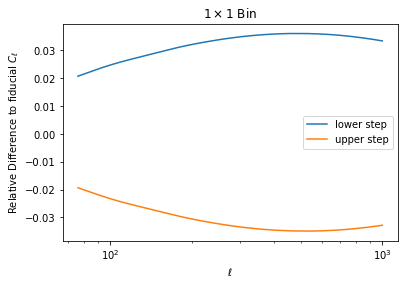

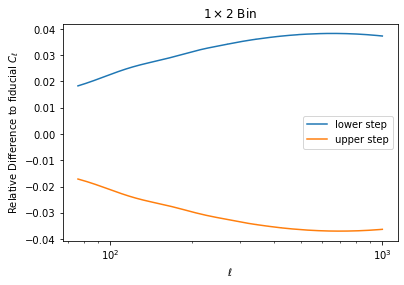

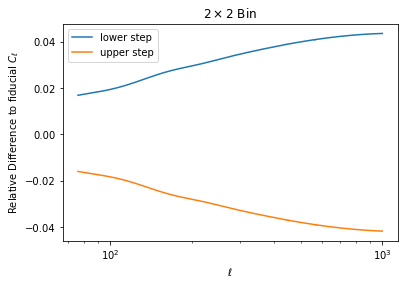

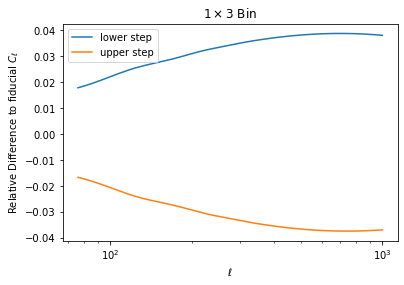

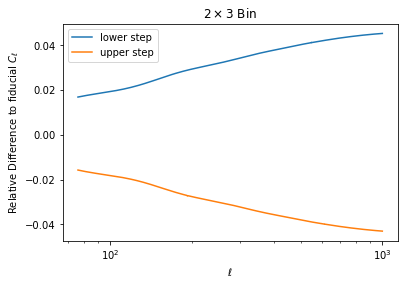

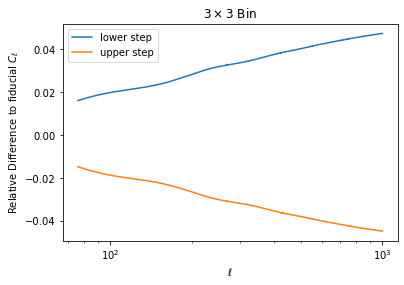

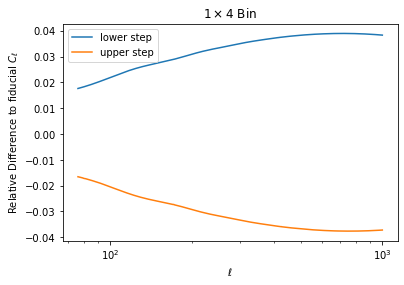

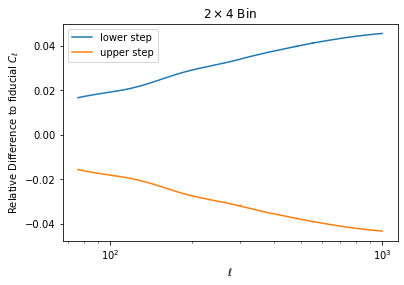

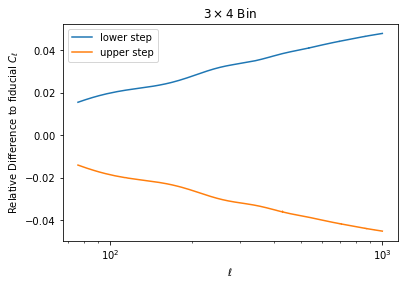

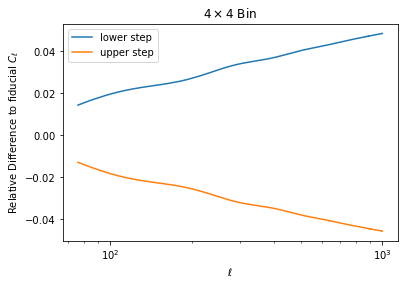

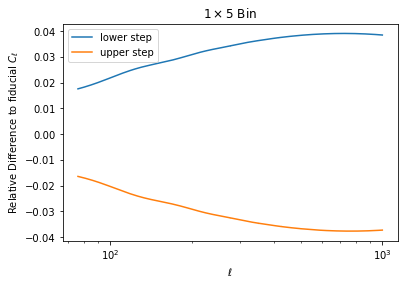

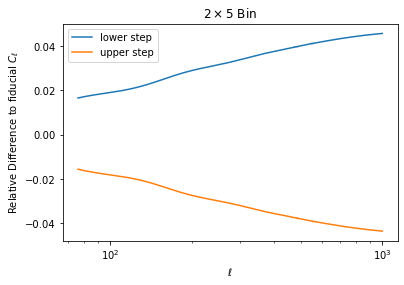

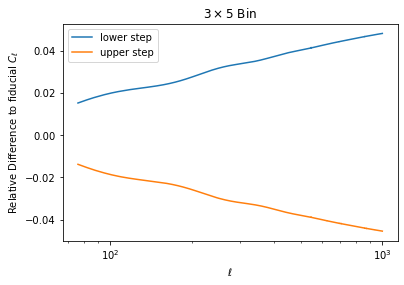

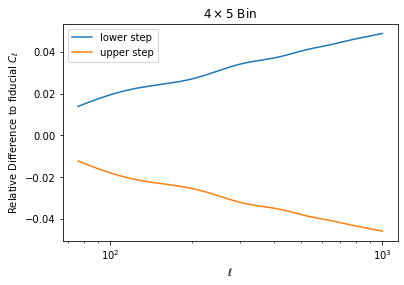

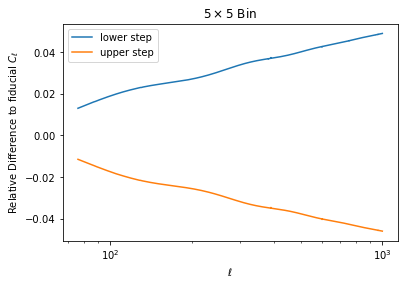

In [62]:
for i in range(1, ccl_om_b_lower.shape[1]):
    fig, ax = plt.subplots()
    ax.semilogx(ccl_om_b_lower[:, 0], (ccl_om_b_lower[:, i] - F.c_ells[:, i])/F.c_ells[:, i], label="lower step")
    ax.semilogx(ccl_om_b_upper[:, 0], (ccl_om_b_upper[:, i] - F.c_ells[:, i])/F.c_ells[:, i], label="upper step")
    ax.legend()
    ax.set_xlabel("$\ell$")
    ax.set_ylabel("Relative Difference to fiducial $C_{\ell}$")
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
    plt.show()

CCL om_b deriv upper and lower C_ells 


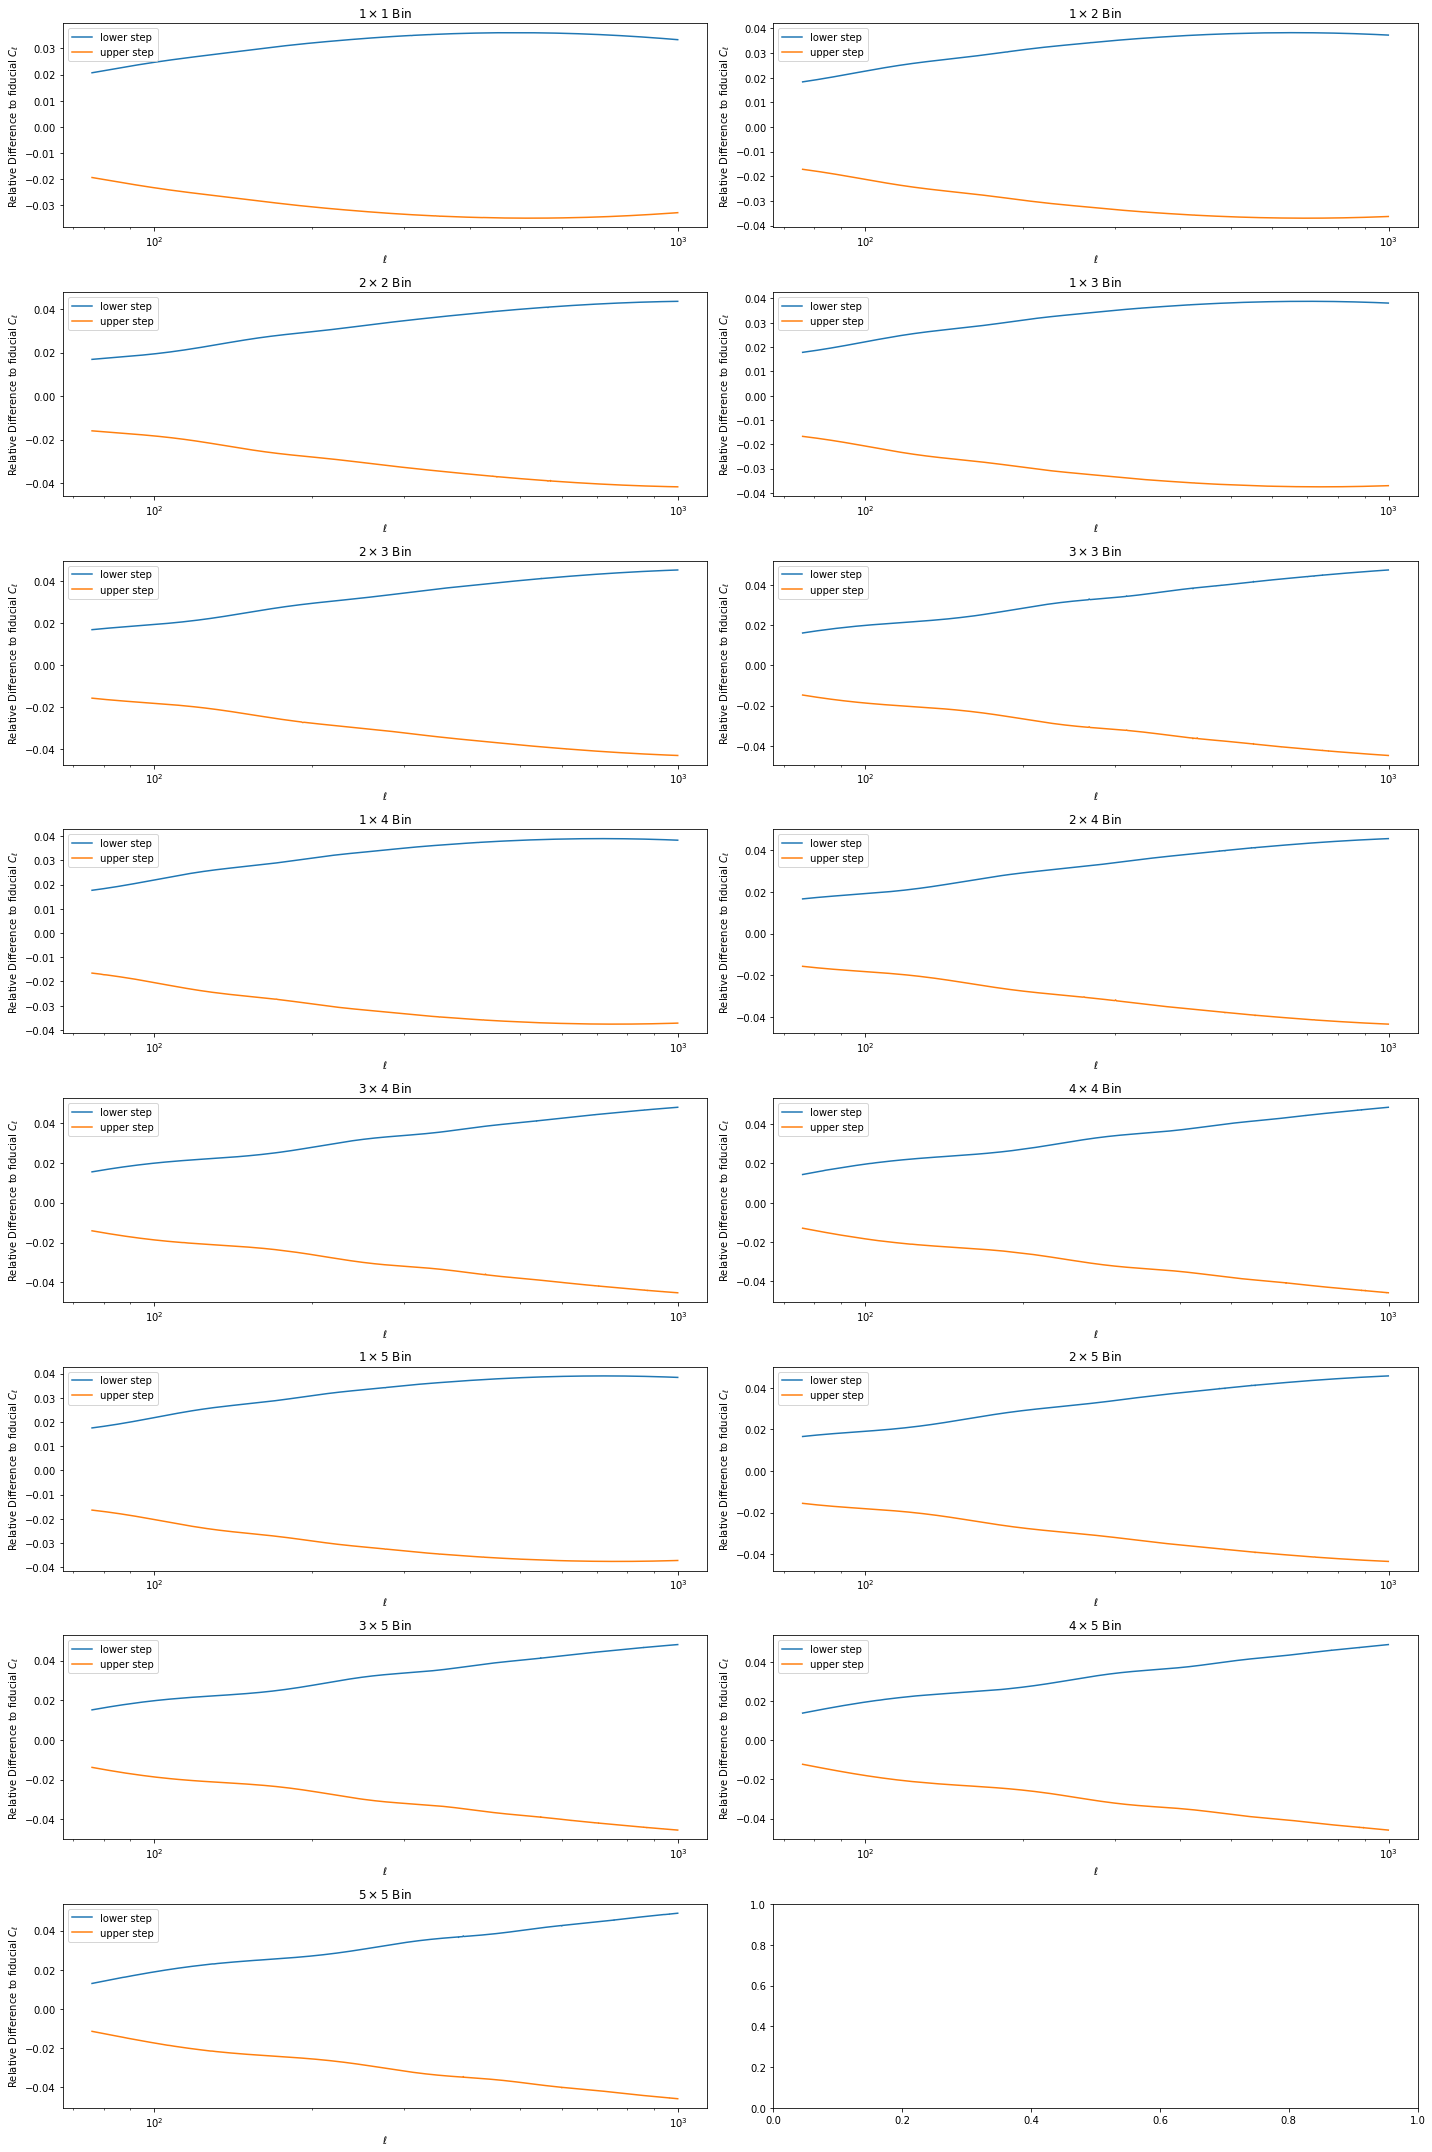

In [58]:
print("CCL om_b deriv upper and lower C_ells ")
fig, axes = plt.subplots(8,2, figsize=(20, 30))
axes = axes.flatten()
for i in range(1, ccl_om_b_lower.shape[1]):
    ax = axes[i-1]
    ax.semilogx(ccl_om_b_lower[:, 0], (ccl_om_b_lower[:, i] - F.c_ells[:, i])/F.c_ells[:, i], label="lower step")
    ax.semilogx(ccl_om_b_upper[:, 0], (ccl_om_b_upper[:, i] - F.c_ells[:, i])/F.c_ells[:, i], label="upper step")
    ax.legend()
    ax.set_xlabel("$\ell$")
    ax.set_ylabel("Relative Difference to fiducial $C_{\ell}$")
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
plt.tight_layout()
plt.show()

## Compare to Cosmosis

In [14]:
cosmosis_om_b_lower = np.loadtxt(".Cl_lower_1_step.dat")
cosmosis_om_b_upper = np.loadtxt(".Cl_upper_1_step.dat")
cosmosis_om_b_deriv = np.loadtxt("deriv_om_b.dat")
cosmosis_c_ells = np.loadtxt("Cl_fid.dat")

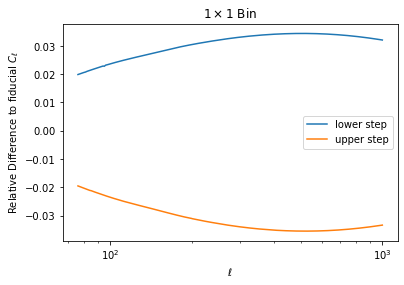

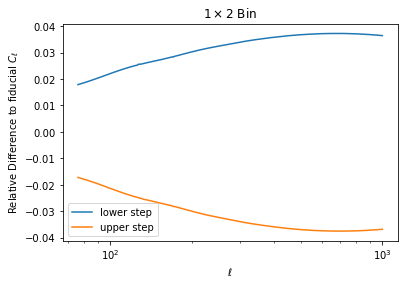

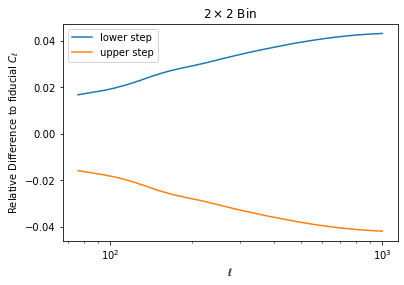

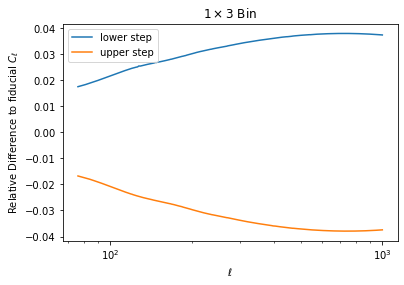

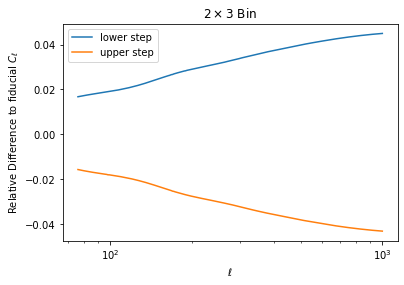

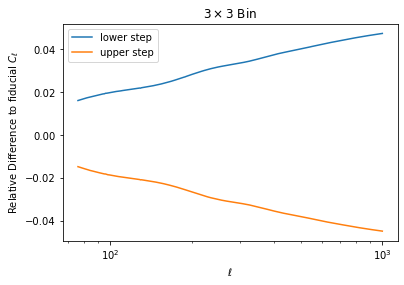

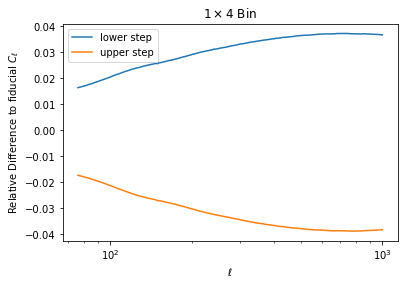

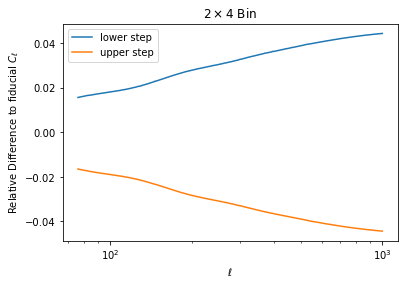

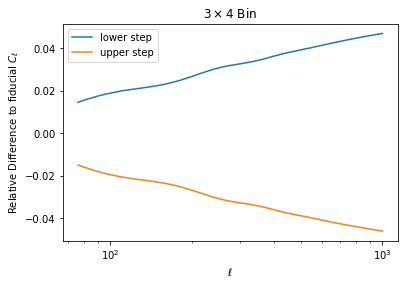

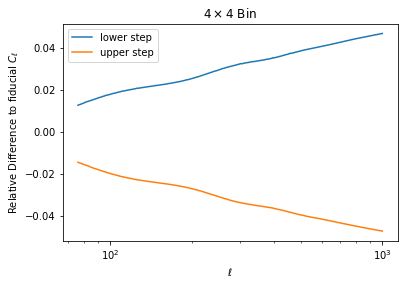

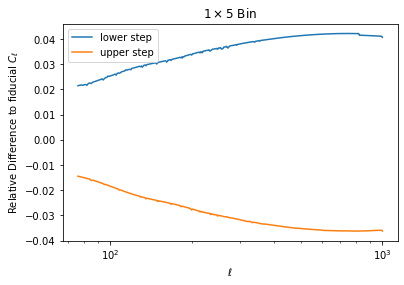

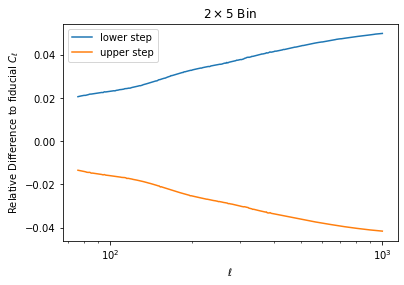

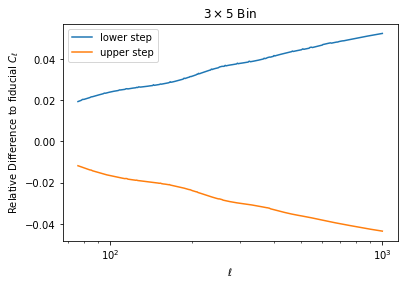

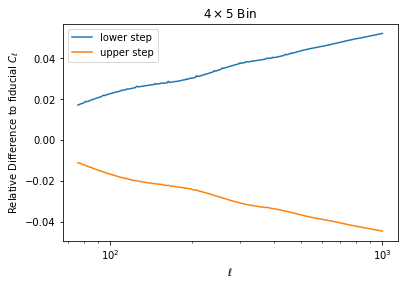

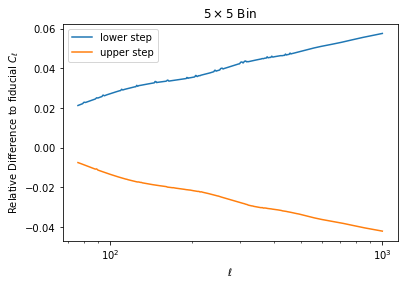

In [69]:
for i in range(1, cosmosis_om_b_lower.shape[1]):
    fig, ax = plt.subplots()
    ax.semilogx(cosmosis_om_b_lower[:, 0], (cosmosis_om_b_lower[:, i] - cosmosis_c_ells[:, i])/cosmosis_c_ells[:, i], label="lower step")
    ax.semilogx(cosmosis_om_b_upper[:, 0], (cosmosis_om_b_upper[:, i] - cosmosis_c_ells[:, i])/cosmosis_c_ells[:, i], label="upper step")
    ax.legend()
    ax.set_xlabel("$\ell$")
    ax.set_ylabel("Relative Difference to fiducial $C_{\ell}$")
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
    plt.show()

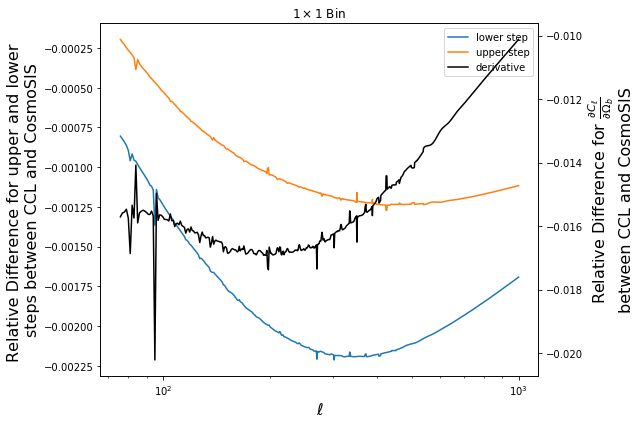

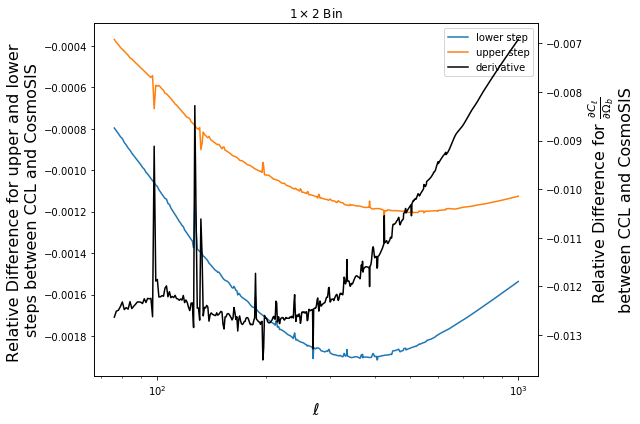

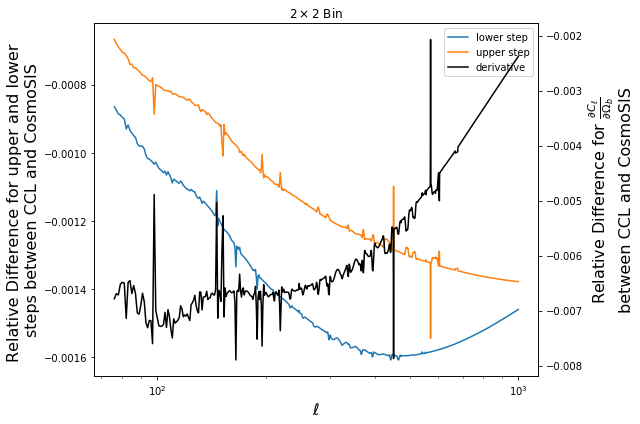

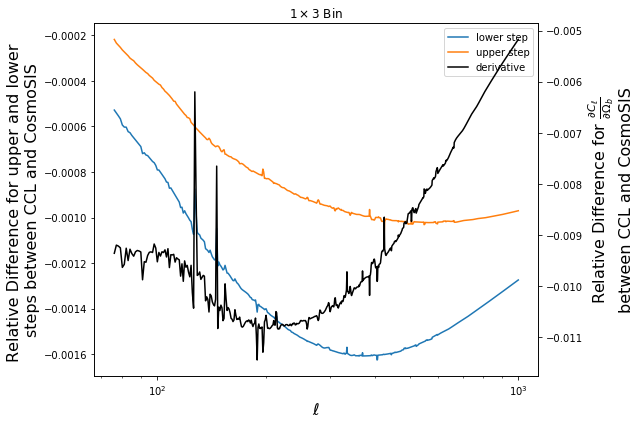

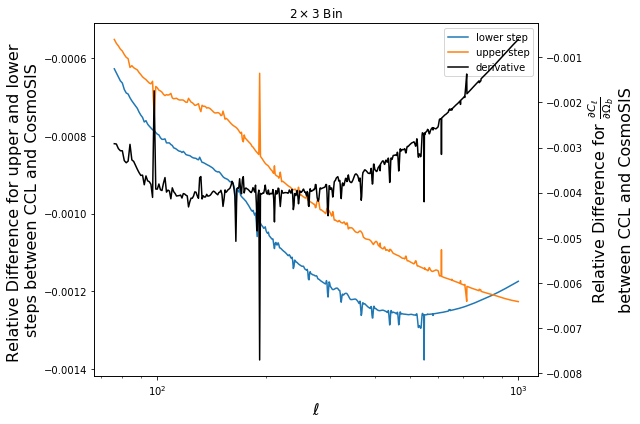

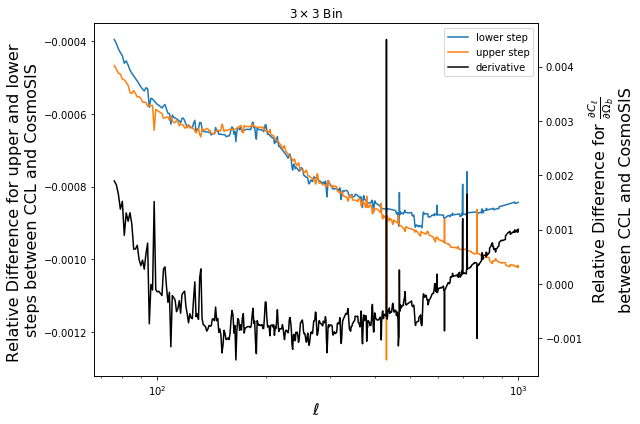

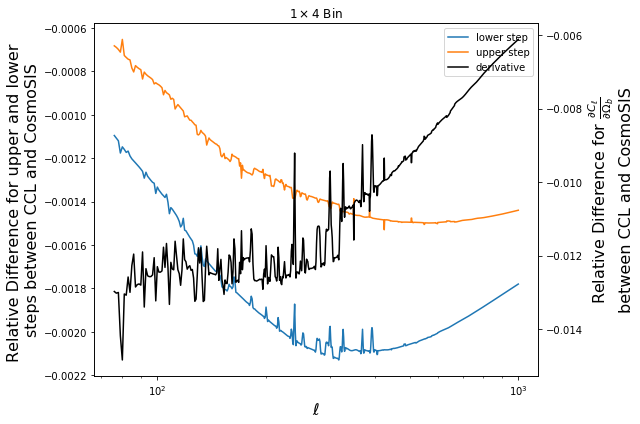

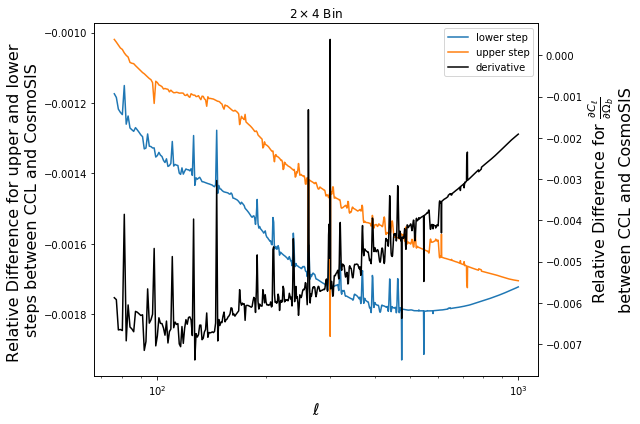

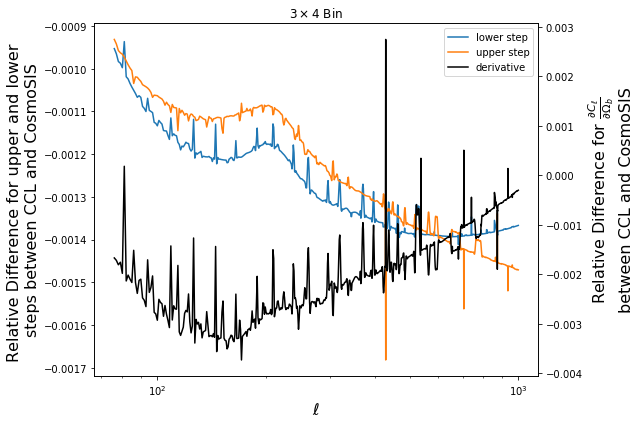

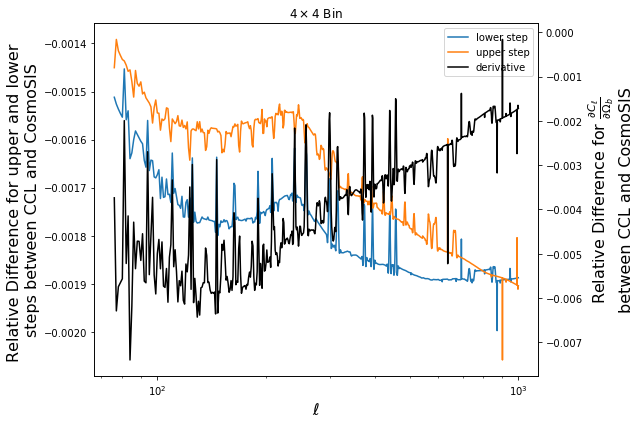

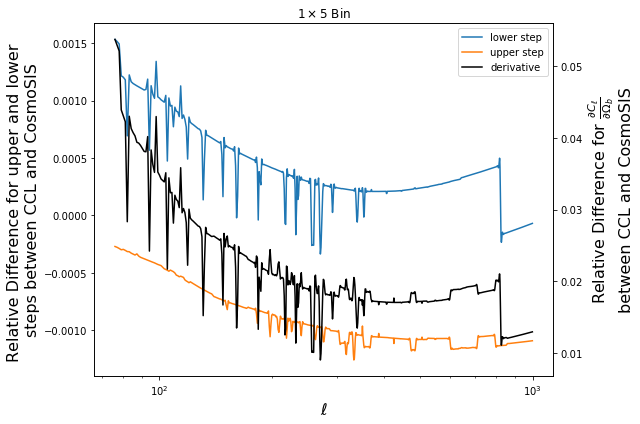

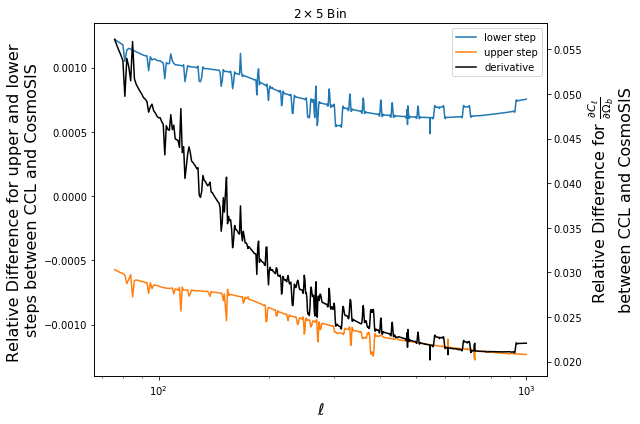

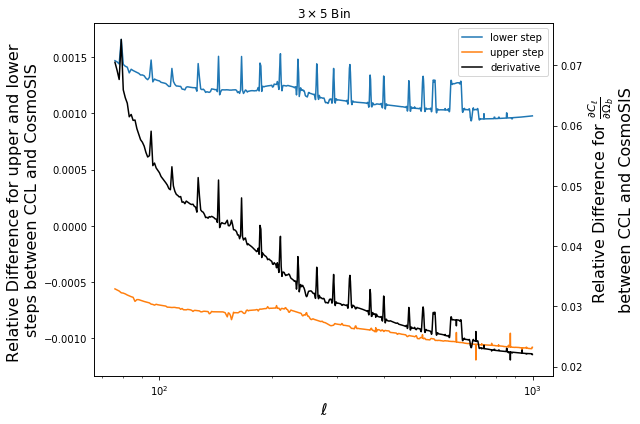

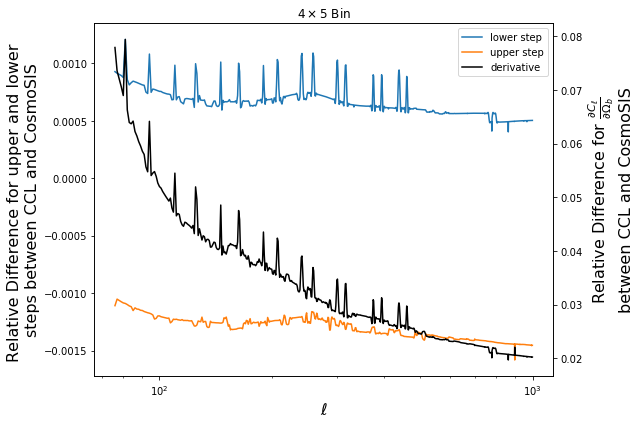

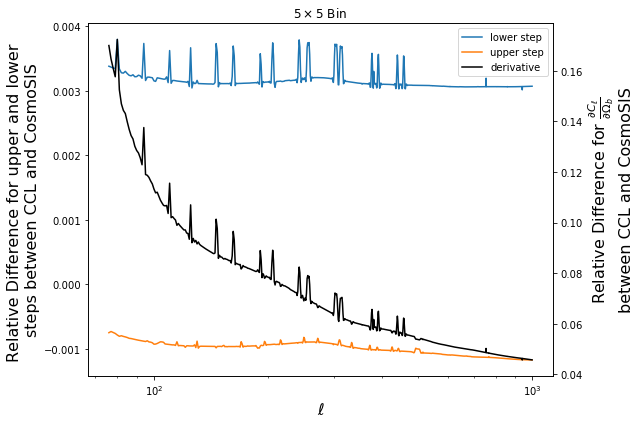

In [17]:
for i in range(1, cosmosis_om_b_lower.shape[1]):
    fig, ax = plt.subplots(figsize=(9,6))
    l1 = ax.semilogx(cosmosis_om_b_lower[:, 0], (-ccl_om_b_lower[:, i] + cosmosis_om_b_lower[:, i])/ccl_om_b_lower[:, i], label="lower step")
    l2 = ax.semilogx(cosmosis_om_b_upper[:, 0], (-ccl_om_b_upper[:, i] + cosmosis_om_b_upper[:, i])/ccl_om_b_upper[:, i], label="upper step")
    ax2 = ax.twinx()
    l3 = ax2.semilogx(cosmosis_om_b_deriv[:, 0], (-ccl_om_b_deriv[:, i] + cosmosis_om_b_deriv[:, i])/ccl_om_b_deriv[:, i], 'k', label="derivative")
    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs)
    ax.set_xlabel("$\ell$", fontsize=16)
    ax.set_ylabel(r'''Relative Difference for upper and lower 
steps between CCL and CosmoSIS''', fontsize=16)
    ax2.set_ylabel(r'''Relative Difference for $\frac{\partial C_\ell}{\partial\Omega_b}$
between CCL and CosmoSIS''', fontsize=16)
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
#     plt.yscale('symlog')
    plt.tight_layout()
    plt.savefig("plots/rel_diff_deriv_om_b_%dx%d.png"%(F.orderings[i-1][0], F.orderings[i-1][1]))
    plt.show()

In [15]:
comp = np.isclose((ccl_om_b_upper[:, 1: ] - ccl_om_b_lower[:, 1: ])/(2 * 0.15 * 0.04), ccl_om_b_deriv[:, 1:])
if comp.shape[0] * comp.shape[1] == comp.sum():
    print("The calculation matches the ccl script")
comp = np.isclose((cosmosis_om_b_upper[:, 1: ] - cosmosis_om_b_lower[:, 1: ])/(2 * 0.15 * 0.04), cosmosis_om_b_deriv[:, 1:])
if comp.shape[0] * comp.shape[1] == comp.sum():
    print("The calculation matches the cosmosis script")

The calculation matches the ccl script
The calculation matches the cosmosis script


In [25]:
row, col = 0, -1
print("Example calculation for ccl")
print("Upper: ", ccl_om_b_upper[row, col], "- lower: ", ccl_om_b_upper[row, col], "numerator: ", (ccl_om_b_upper[row, col] - ccl_om_b_lower[row, col]), "deriv: ", (ccl_om_b_upper[row, col] - ccl_om_b_lower[row, col])/(2 * 0.15 * 0.04))
print("Example calculation for cosmosis")
print("Upper: ", cosmosis_om_b_upper[row, col], "- lower: ", cosmosis_om_b_upper[row, col], "numerator: ", (cosmosis_om_b_upper[row, col] - ccl_om_b_lower[row, col]), "deriv: ", (cosmosis_om_b_upper[row, col] - ccl_om_b_lower[row, col])/(2 * 0.15 * 0.04))
(cosmosis_om_b_deriv[row, col] - ccl_om_b_deriv[row, col])/ccl_om_b_deriv[row, col]

Example calculation for ccl
Upper:  4.6091622342543656e-08 - lower:  4.6091622342543656e-08 numerator:  -1.142968404694272e-09 deriv:  -9.5247367057856e-08
Example calculation for cosmosis
Upper:  4.605714774034206e-08 - lower:  4.605714774034206e-08 numerator:  -1.1774430068958707e-09 deriv:  -9.81202505746559e-08


0.16994686159825428

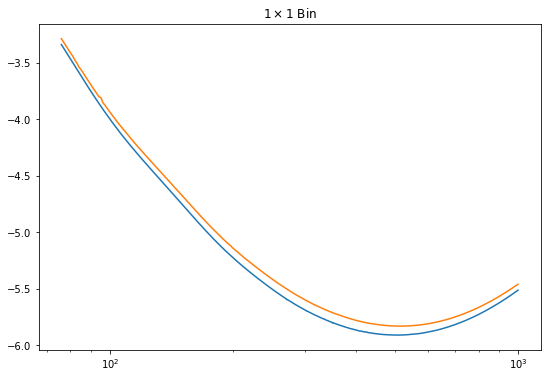

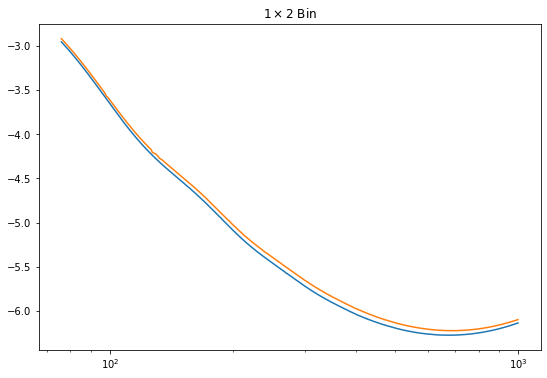

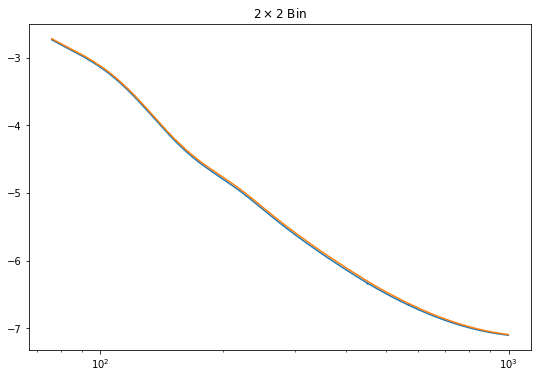

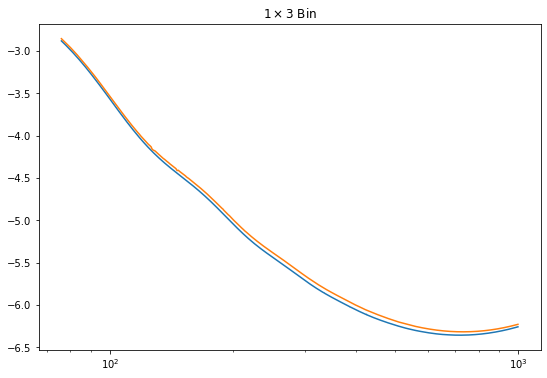

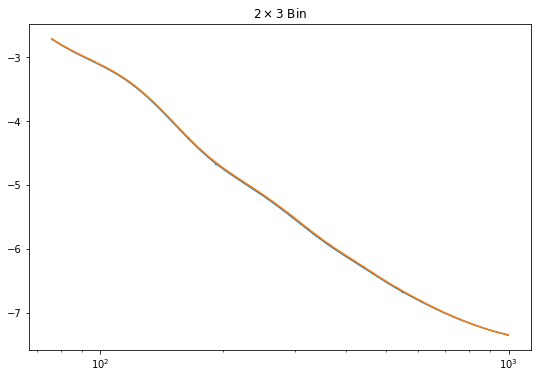

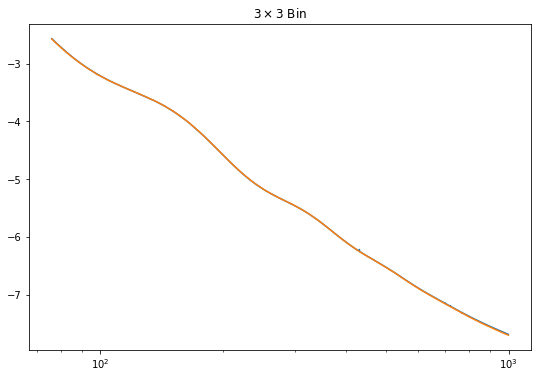

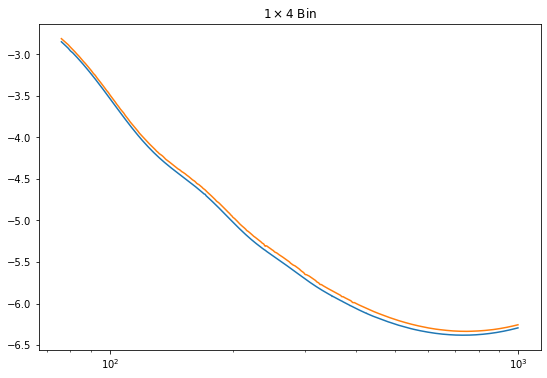

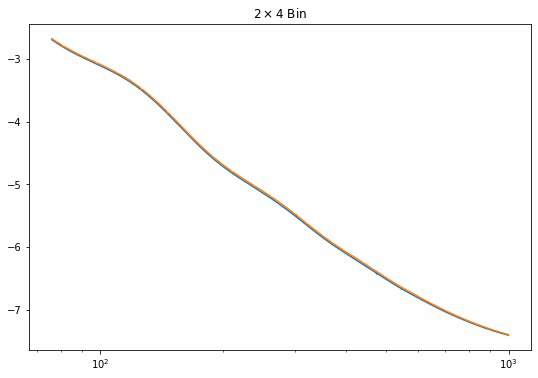

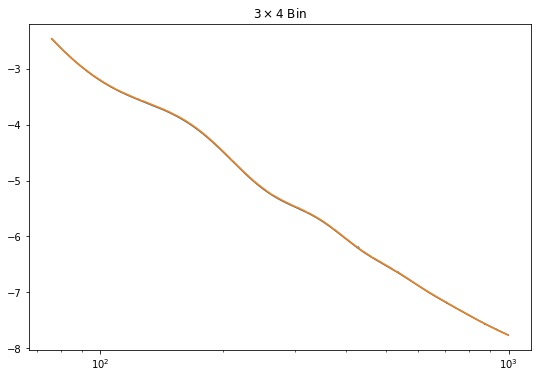

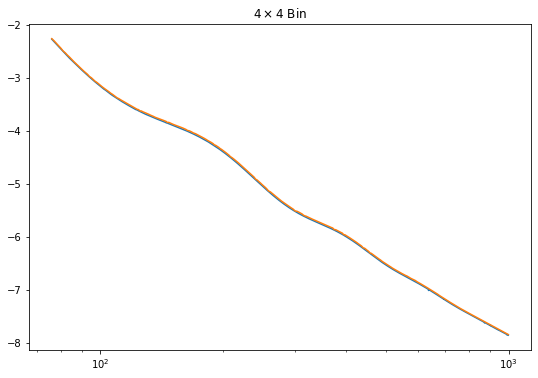

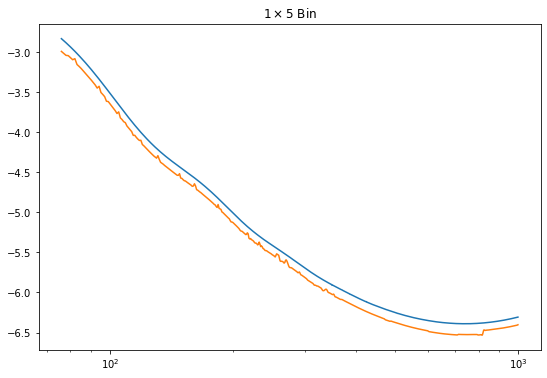

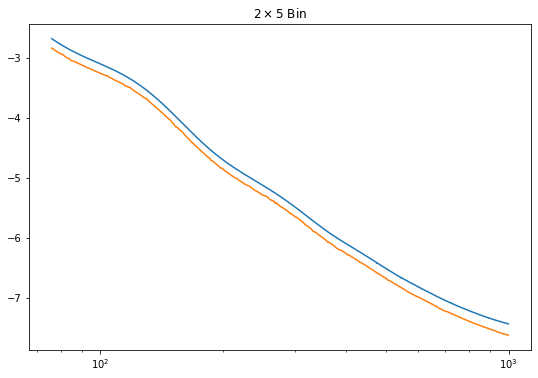

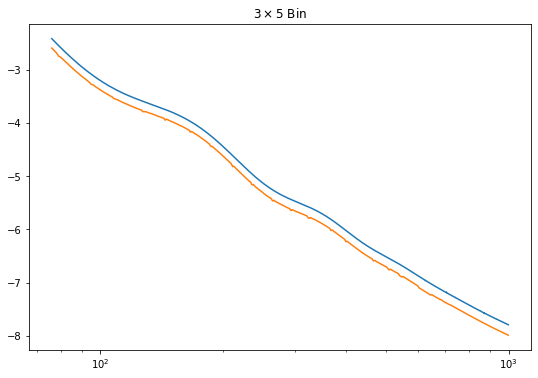

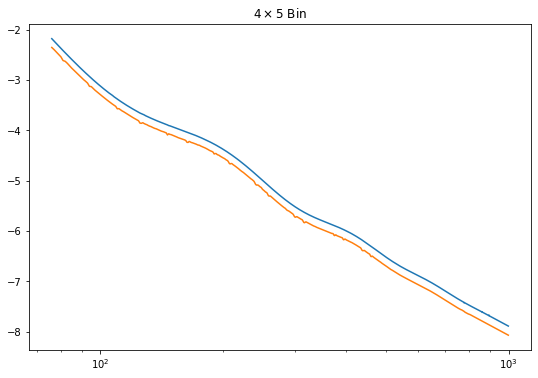

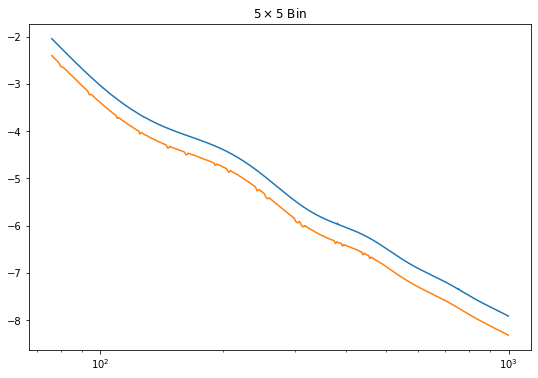

In [26]:
for i in range(1, len(ccl_om_b_deriv[0])):
    fig, ax = plt.subplots(figsize=(9,6))  
    ax.semilogx(ccl_om_b_deriv[:, 0], ccl_om_b_deriv[:, i]/F.c_ells[:, i])
    ax.semilogx(cosmosis_om_b_deriv[:, 0], cosmosis_om_b_deriv[:, i]/cosmosis_c_ells[:, i])
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
    plt.show()

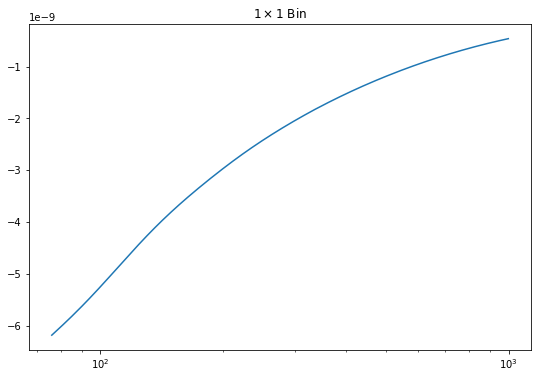

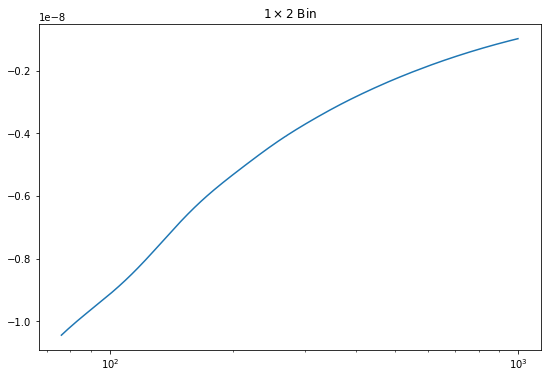

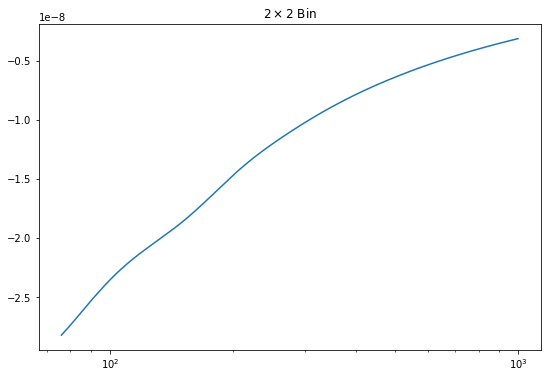

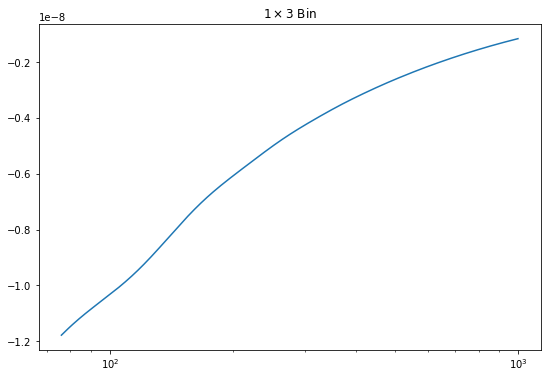

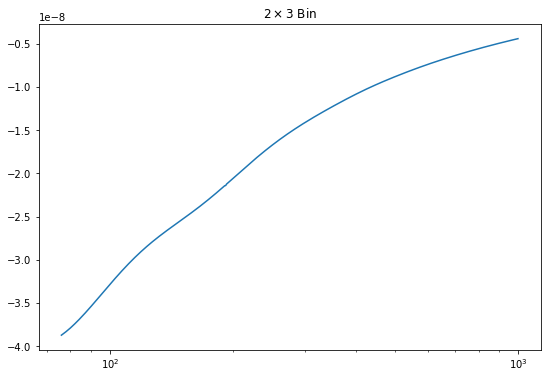

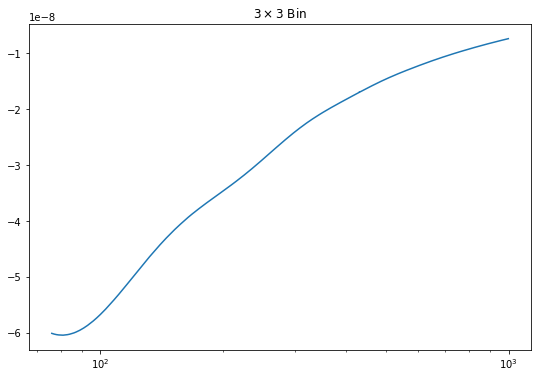

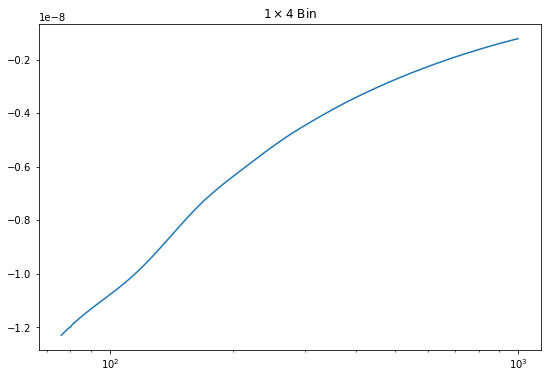

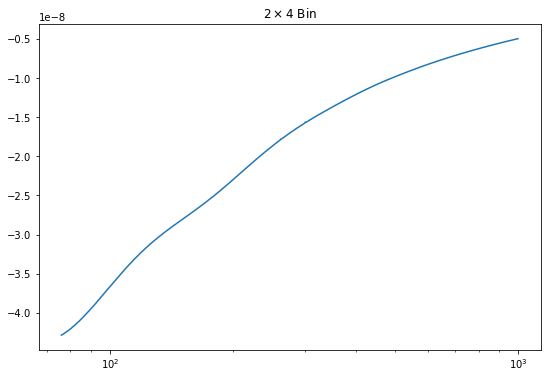

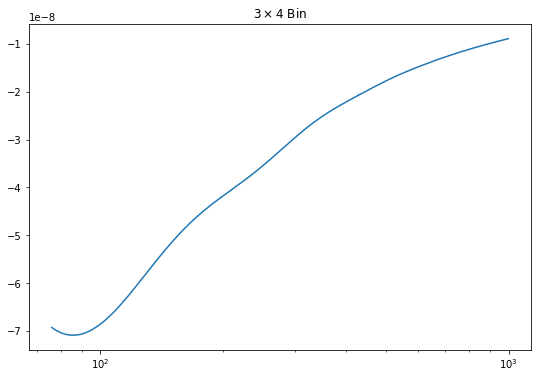

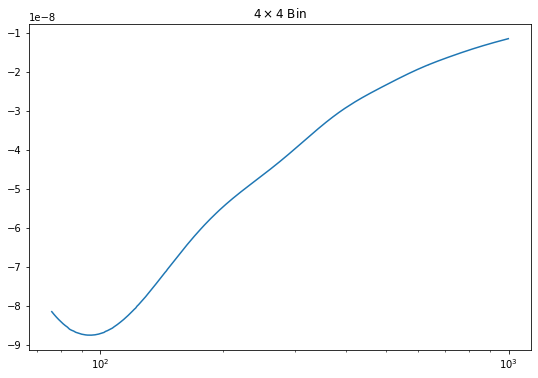

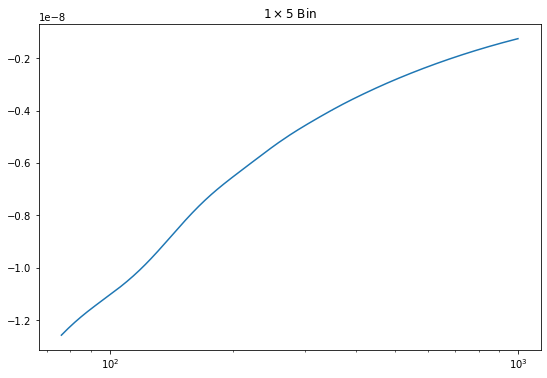

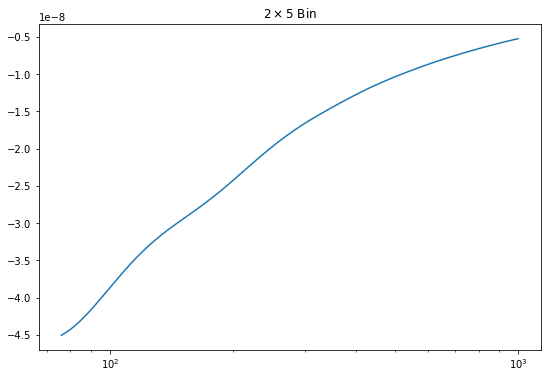

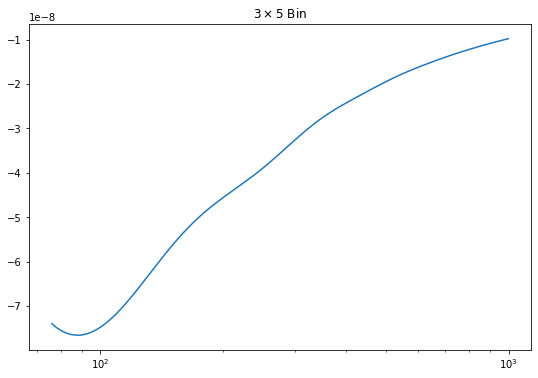

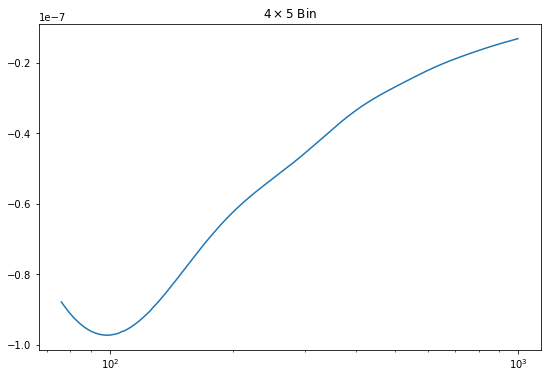

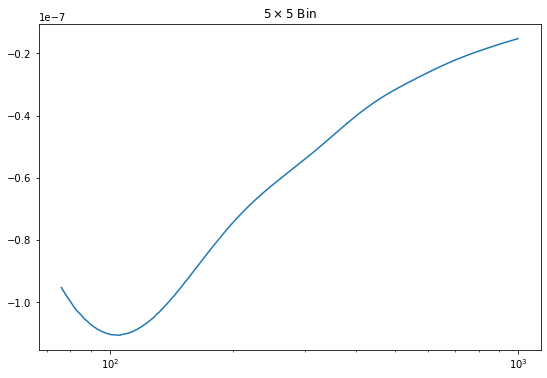

In [21]:
for i in range(1, len(ccl_om_b_deriv[0])):
    fig, ax = plt.subplots(figsize=(9,6))  
    ax.semilogx(ccl_om_b_deriv[:, 0], ccl_om_b_deriv[:, i])
#     ax.semilogx(cosmosis_om_b_deriv[:, 0], cosmosis_c_ells[:, i])
    ax.set_title(r'$%d \times %d$ Bin'%(F.orderings[i-1][0], F.orderings[i-1][1]))
    plt.show()

## Now let's tune some derivatives

In [13]:
delta_start = 1e-3
delta_end = 3e-1
delta_num = 50
deltas = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

#### Parameter $\Omega_m$

In [14]:
tune_para = 'om_m'

In [17]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [16]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [18]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater om_m from 2.500000e-01 by -1 * 2.500000e-04
Changing paramater om_m from 2.500000e-01 by 1 * 2.500000e-04

om_m A_s 101232683518.73259
w0 wa 25.553613572604334
run 2/50
Changing paramater om_m from 2.500000e-01 by -1 * 2.808623e-04
Changing paramater om_m from 2.500000e-01 by 1 * 2.808623e-04

om_m A_s 101227921600.49413
w0 wa 25.55646323205375
run 3/50
Changing paramater om_m from 2.500000e-01 by -1 * 3.155346e-04
Changing paramater om_m from 2.500000e-01 by 1 * 3.155346e-04

om_m A_s 101267014285.50574
w0 wa 25.566311134607915
run 4/50
Changing paramater om_m from 2.500000e-01 by -1 * 3.544871e-04
Changing paramater om_m from 2.500000e-01 by 1 * 3.544871e-04

om_m A_s 101248928339.02913
w0 wa 25.565080144006462
run 5/50
Changing paramater om_m from 2.500000e-01 by -1 * 3.982484e-04
Changing paramater om_m from 2.500000e-01 by 1 * 3.982484e-04

om_m A_s 101291664783.85501
w0 wa 25.57247367473079
run 6/50
Changing paramater om_m from 2.500000e-01 by -1 * 4.4

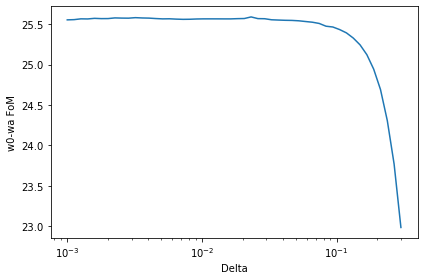

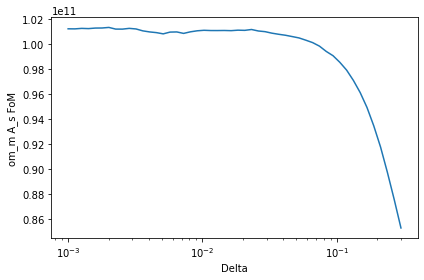

In [20]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $\Omega_m$

In [21]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater om_m from 2.500000e-01 by -1 * 5.000000e-03
Changing paramater om_m from 2.500000e-01 by 1 * 5.000000e-03



#### Parameter $w_0$

In [22]:
tune_para = 'w0'

In [23]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [24]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [25]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-04
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-04

om_m A_s 100420114798.64633
w0 wa 26.7280316000519
run 2/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.011104e-03
Changing paramater w0 from -9.000000e-01 by 1 * 1.011104e-03

om_m A_s 100484700668.76115
w0 wa 26.746243109647537
run 3/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.135925e-03
Changing paramater w0 from -9.000000e-01 by 1 * 1.135925e-03

om_m A_s 100331790052.85048
w0 wa 26.659001387645638
run 4/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.276154e-03
Changing paramater w0 from -9.000000e-01 by 1 * 1.276154e-03

om_m A_s 100103495353.91208
w0 wa 26.57188653329757
run 5/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.433694e-03
Changing paramater w0 from -9.000000e-01 by 1 * 1.433694e-03

om_m A_s 100180482525.04366
w0 wa 26.608188273332924
run 6/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.610683e-03
Ch

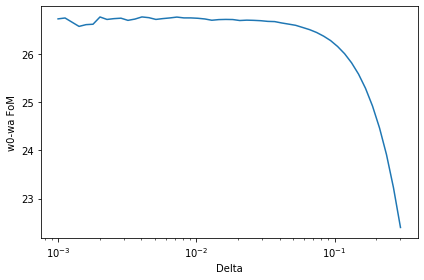

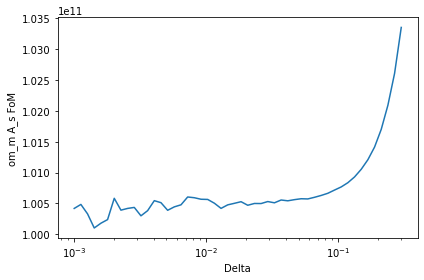

In [26]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $w_0$

In [27]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater w0 from -9.000000e-01 by -1 * 1.800000e-02
Changing paramater w0 from -9.000000e-01 by 1 * 1.800000e-02



#### Parameter $h_0$

In [29]:
tune_para = 'h0'

In [30]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [31]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [32]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater h0 from 7.200000e-01 by -1 * 7.200000e-04
Changing paramater h0 from 7.200000e-01 by 1 * 7.200000e-04

om_m A_s 68149348877.07216
w0 wa 26.496940670894237
run 2/50
Changing paramater h0 from 7.200000e-01 by -1 * 8.088835e-04
Changing paramater h0 from 7.200000e-01 by 1 * 8.088835e-04

om_m A_s 66994391875.185715
w0 wa 26.50976027736758
run 3/50
Changing paramater h0 from 7.200000e-01 by -1 * 9.087397e-04
Changing paramater h0 from 7.200000e-01 by 1 * 9.087397e-04

om_m A_s 66559612249.23319
w0 wa 26.483568570316553
run 4/50
Changing paramater h0 from 7.200000e-01 by -1 * 1.020923e-03
Changing paramater h0 from 7.200000e-01 by 1 * 1.020923e-03

om_m A_s 66348819458.03479
w0 wa 26.46733451542941
run 5/50
Changing paramater h0 from 7.200000e-01 by -1 * 1.146955e-03
Changing paramater h0 from 7.200000e-01 by 1 * 1.146955e-03

om_m A_s 65531038161.886345
w0 wa 26.424904289676004
run 6/50
Changing paramater h0 from 7.200000e-01 by -1 * 1.288546e-03
Changing parama

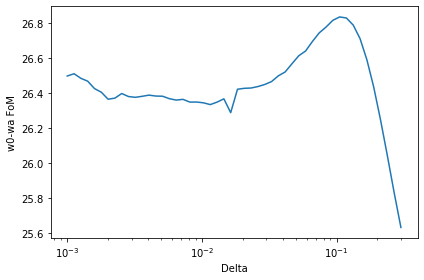

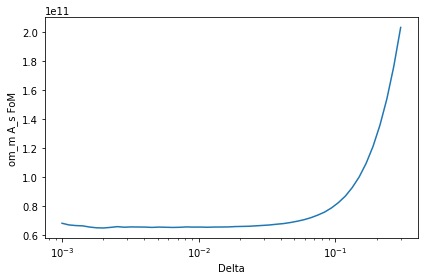

In [33]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.01 for $h_0$

In [48]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.01)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-04
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-04



#### Parameter $A_s$

In [35]:
tune_para = 'A_s'

In [36]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [37]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [38]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.100000e-12
Changing paramater A_s from 2.100000e-09 by 1 * 2.100000e-12

om_m A_s 66905100776.0992
w0 wa 26.481610379344346
run 2/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.359244e-12
Changing paramater A_s from 2.100000e-09 by 1 * 2.359244e-12

om_m A_s 67059350792.11259
w0 wa 26.521096359276857
run 3/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.650491e-12
Changing paramater A_s from 2.100000e-09 by 1 * 2.650491e-12

om_m A_s 66904097394.8301
w0 wa 26.48163445665811
run 4/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.977692e-12
Changing paramater A_s from 2.100000e-09 by 1 * 2.977692e-12

om_m A_s 67031874090.64682
w0 wa 26.495756530804528
run 5/50
Changing paramater A_s from 2.100000e-09 by -1 * 3.345286e-12
Changing paramater A_s from 2.100000e-09 by 1 * 3.345286e-12

om_m A_s 67019032007.53827
w0 wa 26.494101732873986
run 6/50
Changing paramater A_s from 2.100000e-09 by -1 * 3.758260e-12
Changin

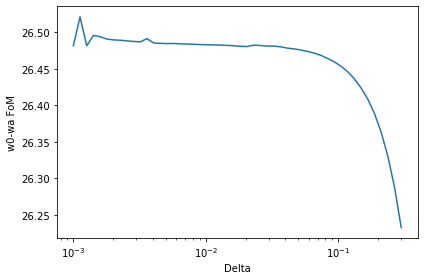

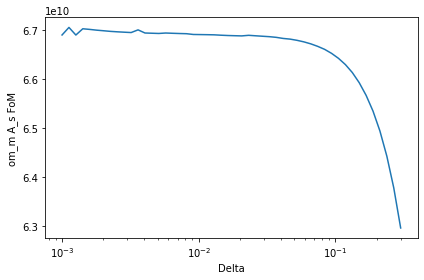

In [39]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $A_s$

In [40]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater A_s from 2.100000e-09 by -1 * 4.200000e-11
Changing paramater A_s from 2.100000e-09 by 1 * 4.200000e-11



#### Parameter $\Omega_b$

In [41]:
tune_para = 'om_b'

In [42]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [43]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [44]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-05
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-05

om_m A_s 70329197404.52943
w0 wa 26.410148797048073
run 2/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.493797e-05
Changing paramater om_b from 4.000000e-02 by 1 * 4.493797e-05

om_m A_s 71197507060.30382
w0 wa 26.448863880037308
run 3/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.048554e-05
Changing paramater om_b from 4.000000e-02 by 1 * 5.048554e-05

om_m A_s 70475738440.44884
w0 wa 26.449298063289405
run 4/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.671794e-05
Changing paramater om_b from 4.000000e-02 by 1 * 5.671794e-05

om_m A_s 73382589262.65999
w0 wa 26.48814707193388
run 5/50
Changing paramater om_b from 4.000000e-02 by -1 * 6.371974e-05
Changing paramater om_b from 4.000000e-02 by 1 * 6.371974e-05

om_m A_s 73023126363.87056
w0 wa 26.49039045723939
run 6/50
Changing paramater om_b from 4.000000e-02 by -1 * 7.158590

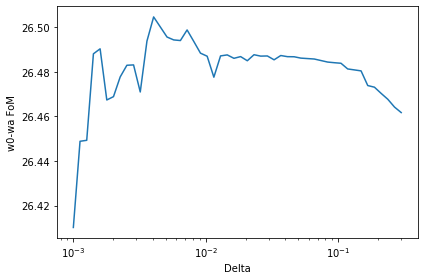

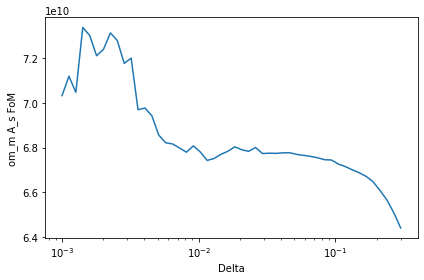

In [45]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $\Omega_b$

In [47]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.05)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater om_b from 4.000000e-02 by -1 * 2.000000e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.000000e-03



#### Parameter $n_s$

In [49]:
tune_para = 'n_s'

In [50]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [51]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [52]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater n_s from 9.600000e-01 by -1 * 9.600000e-04
Changing paramater n_s from 9.600000e-01 by 1 * 9.600000e-04

om_m A_s 69121080868.42474
w0 wa 26.899012037682176
run 2/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.078511e-03
Changing paramater n_s from 9.600000e-01 by 1 * 1.078511e-03

om_m A_s 69118157144.47183
w0 wa 26.899946064279526
run 3/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.211653e-03
Changing paramater n_s from 9.600000e-01 by 1 * 1.211653e-03

om_m A_s 69128913813.0746
w0 wa 26.899255506983437
run 4/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.361231e-03
Changing paramater n_s from 9.600000e-01 by 1 * 1.361231e-03

om_m A_s 69097235667.5731
w0 wa 26.904976116944415
run 5/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.529274e-03
Changing paramater n_s from 9.600000e-01 by 1 * 1.529274e-03

om_m A_s 69119981304.17717
w0 wa 26.90435590985082
run 6/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.718062e-03
Changin

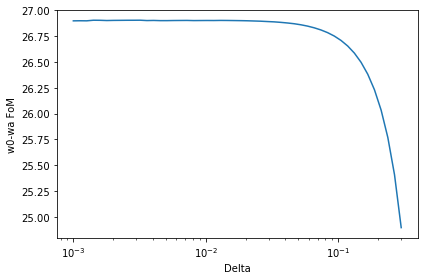

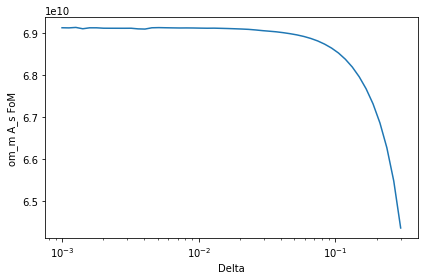

In [53]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $n_s$

In [54]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater n_s from 9.600000e-01 by -1 * 1.920000e-02
Changing paramater n_s from 9.600000e-01 by 1 * 1.920000e-02



#### Parameter $w_a$

In [55]:
tune_para = 'wa'

In [56]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [57]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [58]:
for i in range(41):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

run 1/50
Changing paramater wa from 0.000000e+00 by -1 * 9.000000e-04
Changing paramater wa from 0.000000e+00 by 1 * 9.000000e-04

om_m A_s 68599779028.60725
w0 wa 26.488918744778413
run 2/50
Changing paramater wa from 0.000000e+00 by -1 * 1.011104e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.011104e-03

om_m A_s 68966591044.56396
w0 wa 26.461590146494075
run 3/50
Changing paramater wa from 0.000000e+00 by -1 * 1.135925e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.135925e-03

om_m A_s 68847474432.51501
w0 wa 26.39889100317904
run 4/50
Changing paramater wa from 0.000000e+00 by -1 * 1.276154e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.276154e-03

om_m A_s 68859683759.23225
w0 wa 26.462283540851463
run 5/50
Changing paramater wa from 0.000000e+00 by -1 * 1.433694e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.433694e-03

om_m A_s 68763371073.74896
w0 wa 26.42447425802709
run 6/50
Changing paramater wa from 0.000000e+00 by -1 * 1.610683e-03
Changing paramate

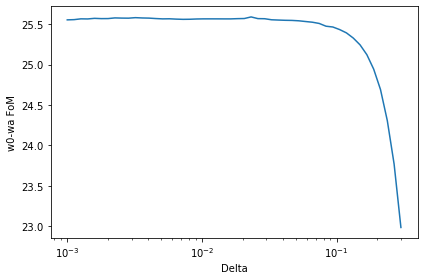

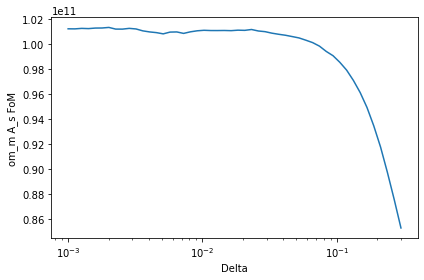

In [20]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $w_a$

In [59]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater wa from 0.000000e+00 by -1 * 1.800000e-02
Changing paramater wa from 0.000000e+00 by 1 * 1.800000e-02



### Fisher Matrix / FoMs

In [60]:
F.get_fisher_mat()
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m,w0,h0,A_s,om_b,n_s,wa
om_m,1.470486e+07,-1.475247e+06,5.440354e+06,8.110872e+14,-8.284990e+06,1.382622e+06,-4.761938e+05
w0,-1.475247e+06,1.496613e+05,-5.468579e+05,-8.181234e+13,8.367294e+05,-1.350891e+05,4.839899e+04
h0,5.440354e+06,-5.468579e+05,2.018941e+06,3.009476e+14,-3.091552e+06,5.124242e+05,-1.770077e+05
A_s,8.110872e+14,-8.181234e+13,3.009476e+14,4.496516e+22,-4.606271e+14,7.542017e+13,-2.649225e+13
om_b,-8.284990e+06,8.367294e+05,-3.091552e+06,-4.606271e+14,4.784764e+06,-7.800707e+05,2.721285e+05
n_s,1.382622e+06,-1.350891e+05,5.124242e+05,7.542017e+13,-7.800707e+05,1.421476e+05,-4.356269e+04
wa,-4.761938e+05,4.839899e+04,-1.770077e+05,-2.649225e+13,2.721285e+05,-4.356269e+04,1.569780e+04


Get some Figures of Merit

In [62]:
para_pairs_list = [("om_m", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 69278445101.4081
w0 wa 26.87987490977877


# Quad Panel Plots 

In [12]:
from tqdm import tqdm_notebook as tqdm

#### Parameter $\Omega_m$

In [13]:
tune_para = 'om_m'

First we do second order error

In [58]:
delta_start = 1e-5
delta_end = 3e-1
delta_num = 50
deltas_2 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [59]:
om_m_2_fom_w0_wa = np.zeros(deltas_2.shape)
om_m_2_fom_om_m_A_s = np.zeros(deltas_2.shape)
deriv_order = 2

In [63]:
for i in tqdm(range(len(deltas_2))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_2[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_m_2_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_m_2_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater om_m from 2.500000e-01 by -1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 1 * 2.500000e-06

om_m A_s 69389027518.45384
w0 wa 26.780623454257157
run 2/50
Changing paramater om_m from 2.500000e-01 by -1 * 3.085388e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.085388e-06

om_m A_s 69256100369.84668
w0 wa 26.882692564210597
run 3/50
Changing paramater om_m from 2.500000e-01 by -1 * 3.807848e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.807848e-06

om_m A_s 68965611436.61694
w0 wa 26.820259166351065
run 4/50
Changing paramater om_m from 2.500000e-01 by -1 * 4.699476e-06
Changing paramater om_m from 2.500000e-01 by 1 * 4.699476e-06

om_m A_s 68722396738.84221
w0 wa 26.84876996315502
run 5/50
Changing paramater om_m from 2.500000e-01 by -1 * 5.799884e-06
Changing paramater om_m from 2.500000e-01 by 1 * 5.799884e-06

om_m A_s 68942487716.66324
w0 wa 26.838755200634516
run 6/50
Changing paramater om_m from 2.500000e-01 by -1 * 7.15795

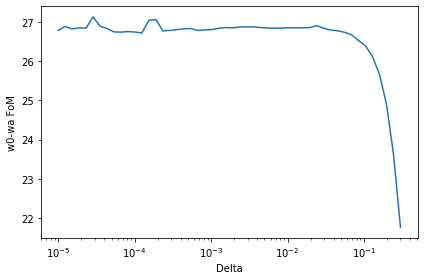

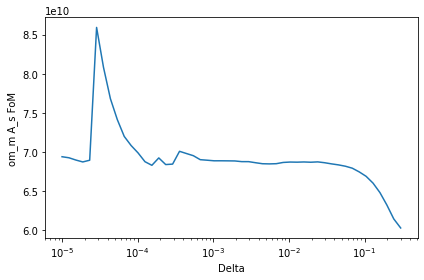

In [64]:
plt.semilogx(deltas_2, om_m_2_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_2, om_m_2_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

In [65]:
np.savetxt(X=np.vstack((deltas_2, om_m_2_fom_om_m_A_s,om_m_2_fom_w0_wa)).T, 
           fname="out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_2.dat")

Fourth order error

In [66]:
delta_start = 1e-5
delta_end = 3e-1
delta_num = 50
deltas_4 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [67]:
om_m_4_fom_w0_wa = np.zeros(deltas_4.shape)
om_m_4_fom_om_m_A_s = np.zeros(deltas_4.shape)
deriv_order = 4

In [69]:
for i in tqdm(range(len(deltas_4))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_4[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_m_4_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_m_4_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater om_m from 2.500000e-01 by -2 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 2 * 2.500000e-06

om_m A_s 70360786277.7262
w0 wa 26.86946151057237
run 2/50
Changing paramater om_m from 2.500000e-01 by -2 * 3.085388e-06
Changing paramater om_m from 2.500000e-01 by -1 * 3.085388e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.085388e-06
Changing paramater om_m from 2.500000e-01 by 2 * 3.085388e-06

om_m A_s 69349662410.18373
w0 wa 26.886537733490563
run 3/50
Changing paramater om_m from 2.500000e-01 by -2 * 3.807848e-06
Changing paramater om_m from 2.500000e-01 by -1 * 3.807848e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.807848e-06
Changing paramater om_m from 2.500000e-01 by 2 * 3.807848e-06

om_m A_s 68980876833.06665
w0 wa 26.808431248694223
run 4/50
Changing paramater om_m from 2.500000e-01 by -2 * 4.69947

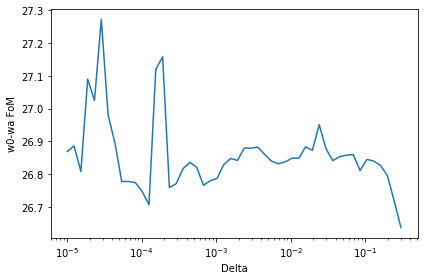

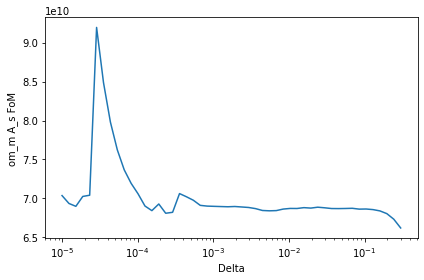

In [70]:
plt.semilogx(deltas_4, om_m_4_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_4, om_m_4_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

In [71]:
np.savetxt(X=np.vstack((deltas_4, om_m_4_fom_om_m_A_s, om_m_4_fom_w0_wa)).T, 
           fname="out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_4.dat")

Sixth order error

In [14]:
delta_start = 1e-5
delta_end = 1e-1
delta_num = 50
deltas_6 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [15]:
om_m_6_fom_w0_wa = np.zeros(deltas_6.shape)
om_m_6_fom_om_m_A_s = np.zeros(deltas_6.shape)
deriv_order = 6

In [16]:
for i in tqdm(range(len(deltas_6))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_6[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_m_6_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_m_6_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater om_m from 2.500000e-01 by -3 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -2 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 2 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 3 * 2.500000e-06

om_m A_s 71586042527.7287
w0 wa 26.89140208430434
run 2/50
Changing paramater om_m from 2.500000e-01 by -3 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by -2 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by -1 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 2 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 3 * 3.016982e-06

om_m A_s 68697369911.63267
w0 wa 27.020947415956638
run 3/50
Changing paramater om_m from 2.500000e-01 by -3 * 3.640871e-06
Changing paramater om_m from 2.500000e-01 by -2 * 3.6408

In [46]:
deltas = deltas[:-1]
om_m_6_fom_om_m_A_s = om_m_6_fom_om_m_A_s[:-1]
om_m_6_fom_w0_wa = om_m_6_fom_w0_wa[:-1]

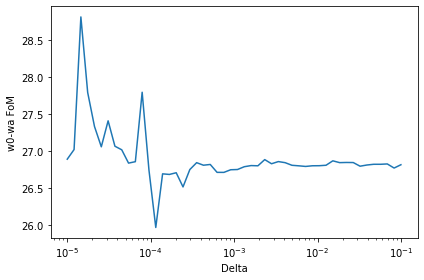

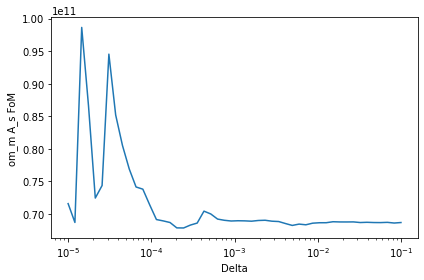

In [17]:
plt.semilogx(deltas_6, om_m_6_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_6, om_m_6_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

In [18]:
np.savetxt(X=np.vstack((deltas_6, om_m_6_fom_om_m_A_s, om_m_6_fom_w0_wa)).T, 
           fname="out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_6.dat")

Eigth order error

In [19]:
delta_start = 1e-5
delta_end = 1e-1
delta_num = 50
deltas_8 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [21]:
om_m_8_fom_w0_wa = np.zeros(deltas_8.shape)
om_m_8_fom_om_m_A_s = np.zeros(deltas_8.shape)
deriv_order = 8

In [22]:
for i in tqdm(range(len(deltas_8))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_8[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_m_8_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_m_8_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater om_m from 2.500000e-01 by -4 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -3 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -2 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by -1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 1 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 2 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 3 * 2.500000e-06
Changing paramater om_m from 2.500000e-01 by 4 * 2.500000e-06

om_m A_s 73441881360.2954
w0 wa 26.96590595910635
run 2/50
Changing paramater om_m from 2.500000e-01 by -4 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by -3 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by -2 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by -1 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 1 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 2 * 3.016982e-06
Changing paramater om_m from 2.500000e-01 by 3 * 3.0169

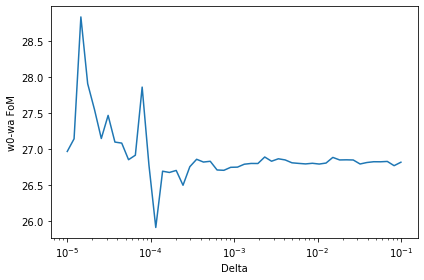

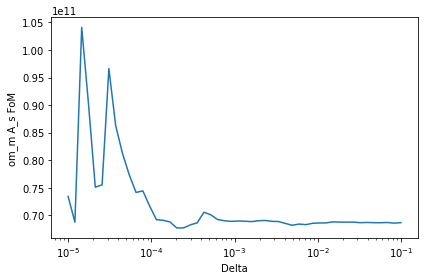

In [23]:
plt.semilogx(deltas_8, om_m_8_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_8, om_m_8_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

In [24]:
np.savetxt(X=np.vstack((deltas_8, om_m_8_fom_om_m_A_s, om_m_8_fom_w0_wa)).T, 
           fname="out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_8.dat")

#### Plots

In [26]:
tmp = np.loadtxt("out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_2.dat")
deltas_2 = tmp[:, 0]
om_m_2_fom_om_m_A_s = tmp[:, 1]
om_m_2_fom_w0_wa = tmp [:, 2]

In [27]:
tmp = np.loadtxt("out_FOM_vs_delta/ccl/FoM_vs_delta_om_m_order_4.dat")
deltas_4 = tmp[:, 0]
om_m_4_fom_om_m_A_s = tmp[:, 1]
om_m_4_fom_w0_wa = tmp [:, 2]

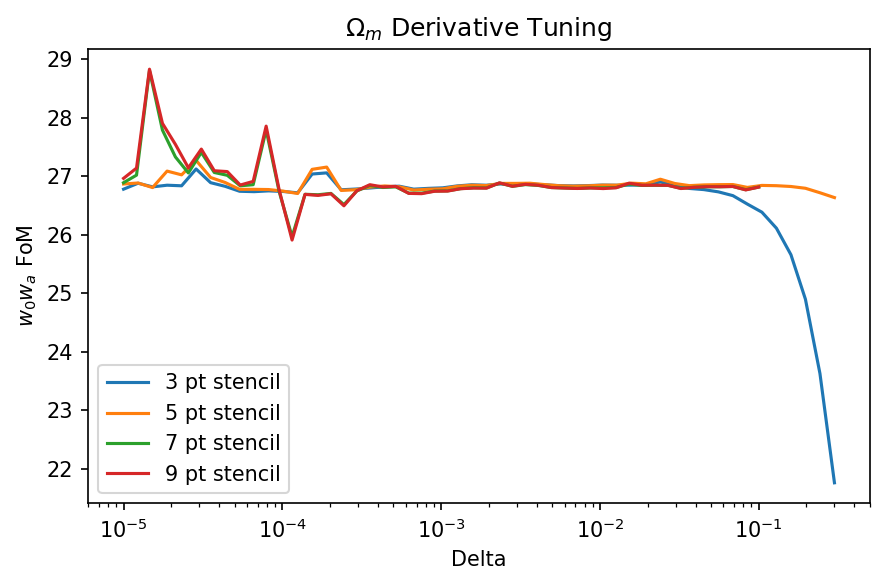

In [28]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, om_m_2_fom_w0_wa, label="3 pt stencil")
plt.semilogx(deltas_4, om_m_4_fom_w0_wa, label="5 pt stencil")
plt.semilogx(deltas_6, om_m_6_fom_w0_wa, label="7 pt stencil")
plt.semilogx(deltas_8, om_m_8_fom_w0_wa, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$w_0w_a$ FoM')
plt.legend()
plt.title(r'$\Omega_m$ Derivative Tuning')
plt.tight_layout()
plt.show()

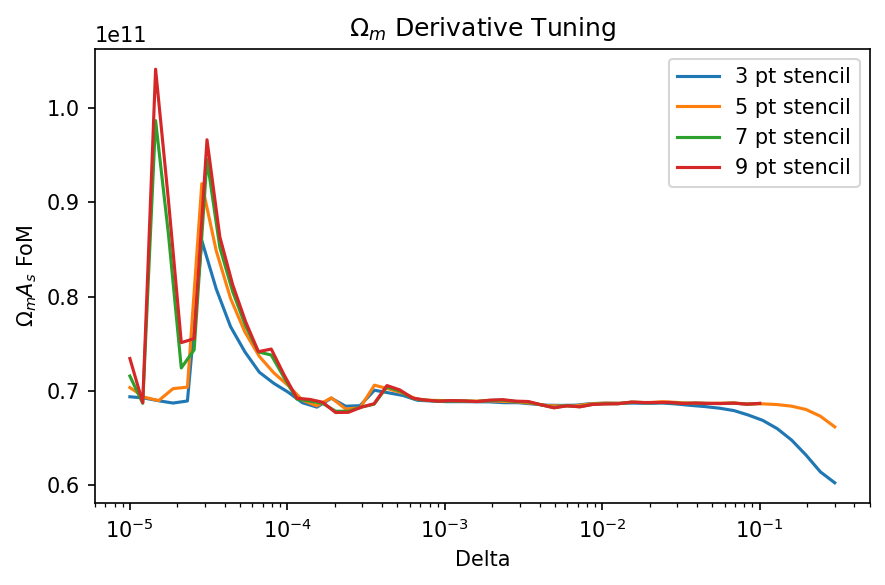

In [29]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, om_m_2_fom_om_m_A_s, label="3 pt stencil")
plt.semilogx(deltas_4, om_m_4_fom_om_m_A_s, label="5 pt stencil")
plt.semilogx(deltas_6, om_m_6_fom_om_m_A_s, label="7 pt stencil")
plt.semilogx(deltas_8, om_m_8_fom_om_m_A_s, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$\Omega_m A_s$ FoM')
plt.legend()
plt.title(r'$\Omega_m$ Derivative Tuning')
plt.tight_layout()
plt.show()

#### Parameter $\Omega_b$

In [70]:
tune_para = 'om_b'

Second order error

In [71]:
delta_start = 1e-5
delta_end = 3e-1
delta_num = 50
deltas_2 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [72]:
om_b_2_fom_w0_wa = np.zeros(deltas.shape)
om_b_2_fom_om_m_A_s = np.zeros(deltas.shape)
deriv_order = 2

In [73]:
for i in tqdm(range(len(deltas))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_b_2_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_b_2_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

  0%|          | 0/50 [00:00<?, ?it/s]

run 1/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-07
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-07

om_m A_s 294622484267.7879
w0 wa 26.668986566142674


  2%|▏         | 1/50 [00:09<07:32,  9.24s/it]

run 2/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.827171e-07
Changing paramater om_b from 4.000000e-02 by 1 * 4.827171e-07

om_m A_s 289207204426.3934
w0 wa 26.692053185264797


  4%|▍         | 2/50 [00:18<07:24,  9.25s/it]

run 3/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.825394e-07
Changing paramater om_b from 4.000000e-02 by 1 * 5.825394e-07

om_m A_s 280158049820.6269
w0 wa 26.624975796886076


  6%|▌         | 3/50 [00:28<07:20,  9.37s/it]

run 4/50
Changing paramater om_b from 4.000000e-02 by -1 * 7.030042e-07
Changing paramater om_b from 4.000000e-02 by 1 * 7.030042e-07

om_m A_s 269028171259.36694
w0 wa 26.629746649451967


  8%|▊         | 4/50 [00:37<07:11,  9.37s/it]

run 5/50
Changing paramater om_b from 4.000000e-02 by -1 * 8.483804e-07
Changing paramater om_b from 4.000000e-02 by 1 * 8.483804e-07

om_m A_s 257502820742.52322
w0 wa 26.607776856365025


 10%|█         | 5/50 [00:46<06:59,  9.33s/it]

run 6/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.023819e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.023819e-06

om_m A_s 239511546842.24457
w0 wa 26.613065592103457


 12%|█▏        | 6/50 [00:56<06:49,  9.31s/it]

run 7/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.235537e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.235537e-06

om_m A_s 221395558711.09988
w0 wa 26.605432930135784


 14%|█▍        | 7/50 [01:05<06:39,  9.28s/it]

run 8/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.491037e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.491037e-06

om_m A_s 211888471518.41388
w0 wa 26.649533433798375


 16%|█▌        | 8/50 [01:14<06:29,  9.26s/it]

run 9/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.799373e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.799373e-06

om_m A_s 182113298469.66544
w0 wa 26.61420543556688


 18%|█▊        | 9/50 [01:23<06:19,  9.26s/it]

run 10/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.171470e-06
Changing paramater om_b from 4.000000e-02 by 1 * 2.171470e-06

om_m A_s 161280294319.7931
w0 wa 26.613091289350475


 20%|██        | 10/50 [01:32<06:10,  9.26s/it]

run 11/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.620514e-06
Changing paramater om_b from 4.000000e-02 by 1 * 2.620514e-06

om_m A_s 144234861733.2191
w0 wa 26.583109242988687


 22%|██▏       | 11/50 [01:42<06:04,  9.34s/it]

run 12/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.162417e-06
Changing paramater om_b from 4.000000e-02 by 1 * 3.162417e-06

om_m A_s 127362580213.12892
w0 wa 26.603179629296896


 24%|██▍       | 12/50 [01:51<05:53,  9.31s/it]

run 13/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.816382e-06
Changing paramater om_b from 4.000000e-02 by 1 * 3.816382e-06

om_m A_s 113327182684.02975
w0 wa 26.610140783788033


 26%|██▌       | 13/50 [02:00<05:43,  9.29s/it]

run 14/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.605582e-06
Changing paramater om_b from 4.000000e-02 by 1 * 4.605582e-06

om_m A_s 109197991254.7633
w0 wa 26.678543470850336


 28%|██▊       | 14/50 [02:10<05:33,  9.27s/it]

run 15/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.557982e-06
Changing paramater om_b from 4.000000e-02 by 1 * 5.557982e-06

om_m A_s 93961976317.93419
w0 wa 26.652404671367485


 30%|███       | 15/50 [02:19<05:25,  9.29s/it]

run 16/50
Changing paramater om_b from 4.000000e-02 by -1 * 6.707332e-06
Changing paramater om_b from 4.000000e-02 by 1 * 6.707332e-06

om_m A_s 83058597655.84459
w0 wa 26.60147332225435


 32%|███▏      | 16/50 [02:28<05:15,  9.28s/it]

run 17/50
Changing paramater om_b from 4.000000e-02 by -1 * 8.094359e-06
Changing paramater om_b from 4.000000e-02 by 1 * 8.094359e-06

om_m A_s 82357974022.2723
w0 wa 26.671378125618496


 34%|███▍      | 17/50 [02:38<05:07,  9.32s/it]

run 18/50
Changing paramater om_b from 4.000000e-02 by -1 * 9.768212e-06
Changing paramater om_b from 4.000000e-02 by 1 * 9.768212e-06

om_m A_s 113034217423.88264
w0 wa 26.364318165307626


 36%|███▌      | 18/50 [02:47<04:57,  9.30s/it]

run 19/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.178821e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.178821e-05

om_m A_s 109804505875.47328
w0 wa 26.29934966761243


 38%|███▊      | 19/50 [02:56<04:47,  9.27s/it]

run 20/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.422592e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.422592e-05

om_m A_s 98870651756.22084
w0 wa 26.32866344647193


 40%|████      | 20/50 [03:05<04:37,  9.25s/it]

run 21/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.716774e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.716774e-05

om_m A_s 94334210376.58336
w0 wa 26.425935334372188


 42%|████▏     | 21/50 [03:15<04:28,  9.25s/it]

run 22/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.071790e-05
Changing paramater om_b from 4.000000e-02 by 1 * 2.071790e-05

om_m A_s 85349844003.20428
w0 wa 26.36557712019624


 44%|████▍     | 22/50 [03:24<04:18,  9.24s/it]

run 23/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.500221e-05
Changing paramater om_b from 4.000000e-02 by 1 * 2.500221e-05

om_m A_s 81159066982.33496
w0 wa 26.486347533262304


 46%|████▌     | 23/50 [03:33<04:09,  9.22s/it]

run 24/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.017248e-05
Changing paramater om_b from 4.000000e-02 by 1 * 3.017248e-05

om_m A_s 77696499509.06532
w0 wa 26.532598936312464


 48%|████▊     | 24/50 [03:43<04:03,  9.38s/it]

run 25/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.641193e-05
Changing paramater om_b from 4.000000e-02 by 1 * 3.641193e-05

om_m A_s 71572216459.57468
w0 wa 26.658801427903693


 50%|█████     | 25/50 [03:52<03:53,  9.33s/it]

run 26/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.394165e-05
Changing paramater om_b from 4.000000e-02 by 1 * 4.394165e-05

om_m A_s 72488553245.88116
w0 wa 26.784891547261786


 52%|█████▏    | 26/50 [04:01<03:42,  9.29s/it]

run 27/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.302845e-05
Changing paramater om_b from 4.000000e-02 by 1 * 5.302845e-05

om_m A_s 71229880911.03117
w0 wa 26.792070172587355


 54%|█████▍    | 27/50 [04:10<03:33,  9.27s/it]

run 28/50
Changing paramater om_b from 4.000000e-02 by -1 * 6.399435e-05
Changing paramater om_b from 4.000000e-02 by 1 * 6.399435e-05

om_m A_s 74574734530.47815
w0 wa 26.823065516402576


 56%|█████▌    | 28/50 [04:20<03:23,  9.26s/it]

run 29/50
Changing paramater om_b from 4.000000e-02 by -1 * 7.722791e-05
Changing paramater om_b from 4.000000e-02 by 1 * 7.722791e-05

om_m A_s 72772952407.15549
w0 wa 26.833735080482306


 58%|█████▊    | 29/50 [04:29<03:14,  9.26s/it]

run 30/50
Changing paramater om_b from 4.000000e-02 by -1 * 9.319807e-05
Changing paramater om_b from 4.000000e-02 by 1 * 9.319807e-05

om_m A_s 74921359725.64607
w0 wa 26.82225854099915


 60%|██████    | 30/50 [04:38<03:05,  9.25s/it]

run 31/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.124707e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.124707e-04

om_m A_s 73504373955.73254
w0 wa 26.822694522142637


 62%|██████▏   | 31/50 [04:48<02:56,  9.29s/it]

run 32/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.357289e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.357289e-04

om_m A_s 71478900425.0942
w0 wa 26.83120518867105


 64%|██████▍   | 32/50 [04:57<02:46,  9.27s/it]

run 33/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.637966e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.637966e-04

om_m A_s 70423906720.80785
w0 wa 26.834018131999052


 66%|██████▌   | 33/50 [05:06<02:37,  9.28s/it]

run 34/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.976685e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.976685e-04

om_m A_s 70062994661.83324
w0 wa 26.828178833303305


 68%|██████▊   | 34/50 [05:15<02:28,  9.26s/it]

run 35/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.385449e-04
Changing paramater om_b from 4.000000e-02 by 1 * 2.385449e-04

om_m A_s 68831825313.98909
w0 wa 26.822864115390104


 70%|███████   | 35/50 [05:25<02:18,  9.26s/it]

run 36/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.878743e-04
Changing paramater om_b from 4.000000e-02 by 1 * 2.878743e-04

om_m A_s 68912084920.7708
w0 wa 26.831468324879616


 72%|███████▏  | 36/50 [05:34<02:09,  9.25s/it]

run 37/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.474045e-04
Changing paramater om_b from 4.000000e-02 by 1 * 3.474045e-04

om_m A_s 69010180316.4867
w0 wa 26.819382853052108


 74%|███████▍  | 37/50 [05:43<02:00,  9.27s/it]

run 38/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.192453e-04
Changing paramater om_b from 4.000000e-02 by 1 * 4.192453e-04

om_m A_s 68628391349.79559
w0 wa 26.816469035596153


 76%|███████▌  | 38/50 [05:52<01:51,  9.31s/it]

run 39/50
Changing paramater om_b from 4.000000e-02 by -1 * 5.059421e-04
Changing paramater om_b from 4.000000e-02 by 1 * 5.059421e-04

om_m A_s 68682750482.89398
w0 wa 26.813626136985974


 78%|███████▊  | 39/50 [06:02<01:42,  9.28s/it]

run 40/50
Changing paramater om_b from 4.000000e-02 by -1 * 6.105672e-04
Changing paramater om_b from 4.000000e-02 by 1 * 6.105672e-04

om_m A_s 68350999753.46858
w0 wa 26.820882347361376


 80%|████████  | 40/50 [06:11<01:32,  9.28s/it]

run 41/50
Changing paramater om_b from 4.000000e-02 by -1 * 7.368280e-04
Changing paramater om_b from 4.000000e-02 by 1 * 7.368280e-04

om_m A_s 68933461153.56306
w0 wa 26.81870343135367


 82%|████████▏ | 41/50 [06:20<01:23,  9.26s/it]

run 42/50
Changing paramater om_b from 4.000000e-02 by -1 * 8.891986e-04
Changing paramater om_b from 4.000000e-02 by 1 * 8.891986e-04

om_m A_s 68762097007.06886
w0 wa 26.822290799286208


 84%|████████▍ | 42/50 [06:29<01:13,  9.25s/it]

run 43/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.073078e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.073078e-03

om_m A_s 68900461090.73993
w0 wa 26.818713096926594


 86%|████████▌ | 43/50 [06:39<01:04,  9.25s/it]

run 44/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.294983e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.294983e-03

om_m A_s 68682458792.14863
w0 wa 26.816278726340137


 88%|████████▊ | 44/50 [06:48<00:55,  9.30s/it]

run 45/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.562776e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.562776e-03

om_m A_s 68580119089.69445
w0 wa 26.819124003011545


 90%|█████████ | 45/50 [06:57<00:46,  9.28s/it]

run 46/50
Changing paramater om_b from 4.000000e-02 by -1 * 1.885947e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.885947e-03

om_m A_s 68661163327.1391
w0 wa 26.818470557166705


 92%|█████████▏| 46/50 [07:07<00:37,  9.26s/it]

run 47/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.275946e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.275946e-03

om_m A_s 68644169906.85562
w0 wa 26.818374886678704


 94%|█████████▍| 47/50 [07:16<00:27,  9.25s/it]

run 48/50
Changing paramater om_b from 4.000000e-02 by -1 * 2.746595e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.746595e-03

om_m A_s 68522807449.617485
w0 wa 26.8159477002674


 96%|█████████▌| 48/50 [07:25<00:18,  9.23s/it]

run 49/50
Changing paramater om_b from 4.000000e-02 by -1 * 3.314571e-03
Changing paramater om_b from 4.000000e-02 by 1 * 3.314571e-03

om_m A_s 68427603949.34134
w0 wa 26.81595658329298


 98%|█████████▊| 49/50 [07:34<00:09,  9.28s/it]

run 50/50
Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-03
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-03

om_m A_s 68257267869.54343
w0 wa 26.815636729869965


100%|██████████| 50/50 [07:44<00:00,  9.28s/it]


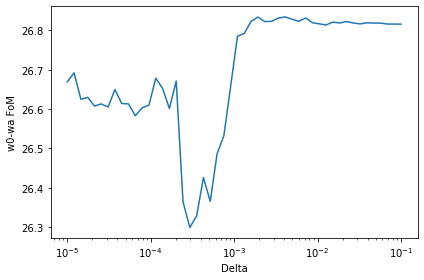

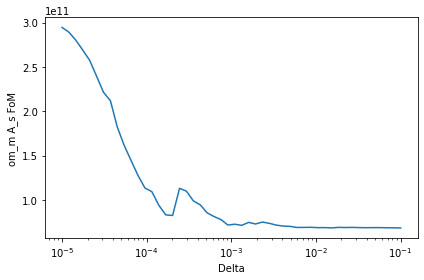

In [74]:
plt.semilogx(deltas_2, om_b_2_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_2, om_b_2_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Fourth order error

In [77]:
delta_start = 1e-5
delta_end = 3e-1
delta_num = 50
deltas_4 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [78]:
om_b_4_fom_w0_wa = np.zeros(deltas.shape)
om_b_4_fom_om_m_A_s = np.zeros(deltas.shape)
deriv_order = 4

In [79]:
for i in tqdm(range(len(deltas))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    om_b_4_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    om_b_4_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

  0%|          | 0/50 [00:00<?, ?it/s]

run 1/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.000000e-07
Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-07
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-07
Changing paramater om_b from 4.000000e-02 by 2 * 4.000000e-07

om_m A_s 298937518445.3144
w0 wa 26.675145319293026


  2%|▏         | 1/50 [00:18<15:02, 18.42s/it]

run 2/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.827171e-07
Changing paramater om_b from 4.000000e-02 by -1 * 4.827171e-07
Changing paramater om_b from 4.000000e-02 by 1 * 4.827171e-07
Changing paramater om_b from 4.000000e-02 by 2 * 4.827171e-07

om_m A_s 294683050708.1903
w0 wa 26.702955069916495


  4%|▍         | 2/50 [00:36<14:45, 18.46s/it]

run 3/50
Changing paramater om_b from 4.000000e-02 by -2 * 5.825394e-07
Changing paramater om_b from 4.000000e-02 by -1 * 5.825394e-07
Changing paramater om_b from 4.000000e-02 by 1 * 5.825394e-07
Changing paramater om_b from 4.000000e-02 by 2 * 5.825394e-07

om_m A_s 287259541713.14606
w0 wa 26.627583773415722


  6%|▌         | 3/50 [00:55<14:32, 18.56s/it]

run 4/50
Changing paramater om_b from 4.000000e-02 by -2 * 7.030042e-07
Changing paramater om_b from 4.000000e-02 by -1 * 7.030042e-07
Changing paramater om_b from 4.000000e-02 by 1 * 7.030042e-07
Changing paramater om_b from 4.000000e-02 by 2 * 7.030042e-07

om_m A_s 278060596013.1301
w0 wa 26.63461952242067


  8%|▊         | 4/50 [01:14<14:16, 18.62s/it]

run 5/50
Changing paramater om_b from 4.000000e-02 by -2 * 8.483804e-07
Changing paramater om_b from 4.000000e-02 by -1 * 8.483804e-07
Changing paramater om_b from 4.000000e-02 by 1 * 8.483804e-07
Changing paramater om_b from 4.000000e-02 by 2 * 8.483804e-07

om_m A_s 268947484924.32883
w0 wa 26.61023240836048


 10%|█         | 5/50 [01:33<13:57, 18.61s/it]

run 6/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.023819e-06
Changing paramater om_b from 4.000000e-02 by -1 * 1.023819e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.023819e-06
Changing paramater om_b from 4.000000e-02 by 2 * 1.023819e-06

om_m A_s 262713268517.2499
w0 wa 26.593948063813325


 12%|█▏        | 6/50 [01:51<13:36, 18.56s/it]

run 7/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.235537e-06
Changing paramater om_b from 4.000000e-02 by -1 * 1.235537e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.235537e-06
Changing paramater om_b from 4.000000e-02 by 2 * 1.235537e-06

om_m A_s 235914025280.99554
w0 wa 26.60257480967619


 14%|█▍        | 7/50 [02:10<13:17, 18.55s/it]

run 8/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.491037e-06
Changing paramater om_b from 4.000000e-02 by -1 * 1.491037e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.491037e-06
Changing paramater om_b from 4.000000e-02 by 2 * 1.491037e-06

om_m A_s 230419015664.79306
w0 wa 26.663840440336653


 16%|█▌        | 8/50 [02:28<12:59, 18.55s/it]

run 9/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.799373e-06
Changing paramater om_b from 4.000000e-02 by -1 * 1.799373e-06
Changing paramater om_b from 4.000000e-02 by 1 * 1.799373e-06
Changing paramater om_b from 4.000000e-02 by 2 * 1.799373e-06

om_m A_s 198962105842.8478
w0 wa 26.617292960266145


 18%|█▊        | 9/50 [02:47<12:38, 18.51s/it]

run 10/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.171470e-06
Changing paramater om_b from 4.000000e-02 by -1 * 2.171470e-06
Changing paramater om_b from 4.000000e-02 by 1 * 2.171470e-06
Changing paramater om_b from 4.000000e-02 by 2 * 2.171470e-06

om_m A_s 177110220161.27368
w0 wa 26.6165530986021


 20%|██        | 10/50 [03:05<12:19, 18.49s/it]

run 11/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.620514e-06
Changing paramater om_b from 4.000000e-02 by -1 * 2.620514e-06
Changing paramater om_b from 4.000000e-02 by 1 * 2.620514e-06
Changing paramater om_b from 4.000000e-02 by 2 * 2.620514e-06

om_m A_s 159345058817.70502
w0 wa 26.582116789977345


 22%|██▏       | 11/50 [03:24<12:02, 18.52s/it]

run 12/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.162417e-06
Changing paramater om_b from 4.000000e-02 by -1 * 3.162417e-06
Changing paramater om_b from 4.000000e-02 by 1 * 3.162417e-06
Changing paramater om_b from 4.000000e-02 by 2 * 3.162417e-06

om_m A_s 143782662686.15207
w0 wa 26.61368617879046


 24%|██▍       | 12/50 [03:42<11:44, 18.55s/it]

run 13/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.816382e-06
Changing paramater om_b from 4.000000e-02 by -1 * 3.816382e-06
Changing paramater om_b from 4.000000e-02 by 1 * 3.816382e-06
Changing paramater om_b from 4.000000e-02 by 2 * 3.816382e-06

om_m A_s 127410094052.00105
w0 wa 26.622881690666734


 26%|██▌       | 13/50 [04:01<11:24, 18.50s/it]

run 14/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.605582e-06
Changing paramater om_b from 4.000000e-02 by -1 * 4.605582e-06
Changing paramater om_b from 4.000000e-02 by 1 * 4.605582e-06
Changing paramater om_b from 4.000000e-02 by 2 * 4.605582e-06

om_m A_s 121475331018.01941
w0 wa 26.75351608684271


 28%|██▊       | 14/50 [04:19<11:05, 18.49s/it]

run 15/50
Changing paramater om_b from 4.000000e-02 by -2 * 5.557982e-06
Changing paramater om_b from 4.000000e-02 by -1 * 5.557982e-06
Changing paramater om_b from 4.000000e-02 by 1 * 5.557982e-06
Changing paramater om_b from 4.000000e-02 by 2 * 5.557982e-06

om_m A_s 108144495613.56558
w0 wa 26.79344645140485


 30%|███       | 15/50 [04:38<10:48, 18.53s/it]

run 16/50
Changing paramater om_b from 4.000000e-02 by -2 * 6.707332e-06
Changing paramater om_b from 4.000000e-02 by -1 * 6.707332e-06
Changing paramater om_b from 4.000000e-02 by 1 * 6.707332e-06
Changing paramater om_b from 4.000000e-02 by 2 * 6.707332e-06

om_m A_s 92500723338.26826
w0 wa 26.752545929188475


 32%|███▏      | 16/50 [04:56<10:28, 18.50s/it]

run 17/50
Changing paramater om_b from 4.000000e-02 by -2 * 8.094359e-06
Changing paramater om_b from 4.000000e-02 by -1 * 8.094359e-06
Changing paramater om_b from 4.000000e-02 by 1 * 8.094359e-06
Changing paramater om_b from 4.000000e-02 by 2 * 8.094359e-06

om_m A_s 90047038183.232
w0 wa 26.777393420293272


 34%|███▍      | 17/50 [05:15<10:09, 18.48s/it]

run 18/50
Changing paramater om_b from 4.000000e-02 by -2 * 9.768212e-06
Changing paramater om_b from 4.000000e-02 by -1 * 9.768212e-06
Changing paramater om_b from 4.000000e-02 by 1 * 9.768212e-06
Changing paramater om_b from 4.000000e-02 by 2 * 9.768212e-06

om_m A_s 124236515222.57053
w0 wa 26.407318089832827


 36%|███▌      | 18/50 [05:33<09:52, 18.53s/it]

run 19/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.178821e-05
Changing paramater om_b from 4.000000e-02 by -1 * 1.178821e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.178821e-05
Changing paramater om_b from 4.000000e-02 by 2 * 1.178821e-05

om_m A_s 120941012195.3001
w0 wa 26.28620730945425


 38%|███▊      | 19/50 [05:52<09:33, 18.51s/it]

run 20/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.422592e-05
Changing paramater om_b from 4.000000e-02 by -1 * 1.422592e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.422592e-05
Changing paramater om_b from 4.000000e-02 by 2 * 1.422592e-05

om_m A_s 107866443605.46552
w0 wa 26.30533035888183


 40%|████      | 20/50 [06:10<09:14, 18.48s/it]

run 21/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.716774e-05
Changing paramater om_b from 4.000000e-02 by -1 * 1.716774e-05
Changing paramater om_b from 4.000000e-02 by 1 * 1.716774e-05
Changing paramater om_b from 4.000000e-02 by 2 * 1.716774e-05

om_m A_s 101919163261.29295
w0 wa 26.39999308477559


 42%|████▏     | 21/50 [06:28<08:55, 18.46s/it]

run 22/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.071790e-05
Changing paramater om_b from 4.000000e-02 by -1 * 2.071790e-05
Changing paramater om_b from 4.000000e-02 by 1 * 2.071790e-05
Changing paramater om_b from 4.000000e-02 by 2 * 2.071790e-05

om_m A_s 93870378370.25375
w0 wa 26.273735795629314


 44%|████▍     | 22/50 [06:47<08:38, 18.52s/it]

run 23/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.500221e-05
Changing paramater om_b from 4.000000e-02 by -1 * 2.500221e-05
Changing paramater om_b from 4.000000e-02 by 1 * 2.500221e-05
Changing paramater om_b from 4.000000e-02 by 2 * 2.500221e-05

om_m A_s 88497680242.66203
w0 wa 26.397753064652875


 46%|████▌     | 23/50 [07:05<08:18, 18.48s/it]

run 24/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.017248e-05
Changing paramater om_b from 4.000000e-02 by -1 * 3.017248e-05
Changing paramater om_b from 4.000000e-02 by 1 * 3.017248e-05
Changing paramater om_b from 4.000000e-02 by 2 * 3.017248e-05

om_m A_s 84303145372.1455
w0 wa 26.404318969858476


 48%|████▊     | 24/50 [07:24<08:02, 18.57s/it]

run 25/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.641193e-05
Changing paramater om_b from 4.000000e-02 by -1 * 3.641193e-05
Changing paramater om_b from 4.000000e-02 by 1 * 3.641193e-05
Changing paramater om_b from 4.000000e-02 by 2 * 3.641193e-05

om_m A_s 74680540586.35403
w0 wa 26.57439879498199


 50%|█████     | 25/50 [07:43<07:45, 18.63s/it]

run 26/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.394165e-05
Changing paramater om_b from 4.000000e-02 by -1 * 4.394165e-05
Changing paramater om_b from 4.000000e-02 by 1 * 4.394165e-05
Changing paramater om_b from 4.000000e-02 by 2 * 4.394165e-05

om_m A_s 73270594319.39983
w0 wa 26.77050963605825


 52%|█████▏    | 26/50 [08:01<07:25, 18.56s/it]

run 27/50
Changing paramater om_b from 4.000000e-02 by -2 * 5.302845e-05
Changing paramater om_b from 4.000000e-02 by -1 * 5.302845e-05
Changing paramater om_b from 4.000000e-02 by 1 * 5.302845e-05
Changing paramater om_b from 4.000000e-02 by 2 * 5.302845e-05

om_m A_s 71272081229.64246
w0 wa 26.780762605534058


 54%|█████▍    | 27/50 [08:20<07:05, 18.52s/it]

run 28/50
Changing paramater om_b from 4.000000e-02 by -2 * 6.399435e-05
Changing paramater om_b from 4.000000e-02 by -1 * 6.399435e-05
Changing paramater om_b from 4.000000e-02 by 1 * 6.399435e-05
Changing paramater om_b from 4.000000e-02 by 2 * 6.399435e-05

om_m A_s 76911718997.06169
w0 wa 26.816032639806277


 56%|█████▌    | 28/50 [08:38<06:47, 18.54s/it]

run 29/50
Changing paramater om_b from 4.000000e-02 by -2 * 7.722791e-05
Changing paramater om_b from 4.000000e-02 by -1 * 7.722791e-05
Changing paramater om_b from 4.000000e-02 by 1 * 7.722791e-05
Changing paramater om_b from 4.000000e-02 by 2 * 7.722791e-05

om_m A_s 74726369324.11583
w0 wa 26.830976635334988


 58%|█████▊    | 29/50 [08:57<06:29, 18.53s/it]

run 30/50
Changing paramater om_b from 4.000000e-02 by -2 * 9.319807e-05
Changing paramater om_b from 4.000000e-02 by -1 * 9.319807e-05
Changing paramater om_b from 4.000000e-02 by 1 * 9.319807e-05
Changing paramater om_b from 4.000000e-02 by 2 * 9.319807e-05

om_m A_s 77529982293.74919
w0 wa 26.819859905854557


 60%|██████    | 30/50 [09:16<06:10, 18.53s/it]

run 31/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.124707e-04
Changing paramater om_b from 4.000000e-02 by -1 * 1.124707e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.124707e-04
Changing paramater om_b from 4.000000e-02 by 2 * 1.124707e-04

om_m A_s 75632079037.25383
w0 wa 26.821596490325387


 62%|██████▏   | 31/50 [09:34<05:51, 18.49s/it]

run 32/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.357289e-04
Changing paramater om_b from 4.000000e-02 by -1 * 1.357289e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.357289e-04
Changing paramater om_b from 4.000000e-02 by 2 * 1.357289e-04

om_m A_s 72477656720.08466
w0 wa 26.833490635386436


 64%|██████▍   | 32/50 [09:52<05:33, 18.52s/it]

run 33/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.637966e-04
Changing paramater om_b from 4.000000e-02 by -1 * 1.637966e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.637966e-04
Changing paramater om_b from 4.000000e-02 by 2 * 1.637966e-04

om_m A_s 71210839236.09824
w0 wa 26.835490088621054


 66%|██████▌   | 33/50 [10:15<05:34, 19.65s/it]

run 34/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.976685e-04
Changing paramater om_b from 4.000000e-02 by -1 * 1.976685e-04
Changing paramater om_b from 4.000000e-02 by 1 * 1.976685e-04
Changing paramater om_b from 4.000000e-02 by 2 * 1.976685e-04

om_m A_s 70599265701.7044
w0 wa 26.83029552744198


 68%|██████▊   | 34/50 [10:33<05:09, 19.33s/it]

run 35/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.385449e-04
Changing paramater om_b from 4.000000e-02 by -1 * 2.385449e-04
Changing paramater om_b from 4.000000e-02 by 1 * 2.385449e-04
Changing paramater om_b from 4.000000e-02 by 2 * 2.385449e-04

om_m A_s 69059035301.65721
w0 wa 26.826635046133003


 70%|███████   | 35/50 [10:52<04:46, 19.13s/it]

run 36/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.878743e-04
Changing paramater om_b from 4.000000e-02 by -1 * 2.878743e-04
Changing paramater om_b from 4.000000e-02 by 1 * 2.878743e-04
Changing paramater om_b from 4.000000e-02 by 2 * 2.878743e-04

om_m A_s 69119831972.93901
w0 wa 26.83471705967063


 72%|███████▏  | 36/50 [11:10<04:24, 18.91s/it]

run 37/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.474045e-04
Changing paramater om_b from 4.000000e-02 by -1 * 3.474045e-04
Changing paramater om_b from 4.000000e-02 by 1 * 3.474045e-04
Changing paramater om_b from 4.000000e-02 by 2 * 3.474045e-04

om_m A_s 69105402354.82242
w0 wa 26.819293887131316


 74%|███████▍  | 37/50 [11:29<04:05, 18.85s/it]

run 38/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.192453e-04
Changing paramater om_b from 4.000000e-02 by -1 * 4.192453e-04
Changing paramater om_b from 4.000000e-02 by 1 * 4.192453e-04
Changing paramater om_b from 4.000000e-02 by 2 * 4.192453e-04

om_m A_s 68590382904.07171
w0 wa 26.81631952427081


 76%|███████▌  | 38/50 [11:48<03:45, 18.80s/it]

run 39/50
Changing paramater om_b from 4.000000e-02 by -2 * 5.059421e-04
Changing paramater om_b from 4.000000e-02 by -1 * 5.059421e-04
Changing paramater om_b from 4.000000e-02 by 1 * 5.059421e-04
Changing paramater om_b from 4.000000e-02 by 2 * 5.059421e-04

om_m A_s 68704515149.58751
w0 wa 26.810948373280993


 78%|███████▊  | 39/50 [12:06<03:25, 18.67s/it]

run 40/50
Changing paramater om_b from 4.000000e-02 by -2 * 6.105672e-04
Changing paramater om_b from 4.000000e-02 by -1 * 6.105672e-04
Changing paramater om_b from 4.000000e-02 by 1 * 6.105672e-04
Changing paramater om_b from 4.000000e-02 by 2 * 6.105672e-04

om_m A_s 68237950273.24103
w0 wa 26.822064539069594


 80%|████████  | 40/50 [12:25<03:05, 18.59s/it]

run 41/50
Changing paramater om_b from 4.000000e-02 by -2 * 7.368280e-04
Changing paramater om_b from 4.000000e-02 by -1 * 7.368280e-04
Changing paramater om_b from 4.000000e-02 by 1 * 7.368280e-04
Changing paramater om_b from 4.000000e-02 by 2 * 7.368280e-04

om_m A_s 69034132556.39206
w0 wa 26.818559540604056


 82%|████████▏ | 41/50 [12:43<02:46, 18.54s/it]

run 42/50
Changing paramater om_b from 4.000000e-02 by -2 * 8.891986e-04
Changing paramater om_b from 4.000000e-02 by -1 * 8.891986e-04
Changing paramater om_b from 4.000000e-02 by 1 * 8.891986e-04
Changing paramater om_b from 4.000000e-02 by 2 * 8.891986e-04

om_m A_s 68798869156.26723
w0 wa 26.823476370253097


 84%|████████▍ | 42/50 [13:02<02:28, 18.56s/it]

run 43/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.073078e-03
Changing paramater om_b from 4.000000e-02 by -1 * 1.073078e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.073078e-03
Changing paramater om_b from 4.000000e-02 by 2 * 1.073078e-03

om_m A_s 69015204315.12271
w0 wa 26.819259123768553


 86%|████████▌ | 43/50 [13:20<02:09, 18.54s/it]

run 44/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.294983e-03
Changing paramater om_b from 4.000000e-02 by -1 * 1.294983e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.294983e-03
Changing paramater om_b from 4.000000e-02 by 2 * 1.294983e-03

om_m A_s 68730518314.77184
w0 wa 26.816040535061376


 88%|████████▊ | 44/50 [13:39<01:51, 18.50s/it]

run 45/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.562776e-03
Changing paramater om_b from 4.000000e-02 by -1 * 1.562776e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.562776e-03
Changing paramater om_b from 4.000000e-02 by 2 * 1.562776e-03

om_m A_s 68618901320.11277
w0 wa 26.82018573291599


 90%|█████████ | 45/50 [13:57<01:32, 18.52s/it]

run 46/50
Changing paramater om_b from 4.000000e-02 by -2 * 1.885947e-03
Changing paramater om_b from 4.000000e-02 by -1 * 1.885947e-03
Changing paramater om_b from 4.000000e-02 by 1 * 1.885947e-03
Changing paramater om_b from 4.000000e-02 by 2 * 1.885947e-03

om_m A_s 68762093724.33258
w0 wa 26.81920568081868


 92%|█████████▏| 46/50 [14:15<01:13, 18.47s/it]

run 47/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.275946e-03
Changing paramater om_b from 4.000000e-02 by -1 * 2.275946e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.275946e-03
Changing paramater om_b from 4.000000e-02 by 2 * 2.275946e-03

om_m A_s 68821180058.47244
w0 wa 26.818682145164157


 94%|█████████▍| 47/50 [14:34<00:55, 18.52s/it]

run 48/50
Changing paramater om_b from 4.000000e-02 by -2 * 2.746595e-03
Changing paramater om_b from 4.000000e-02 by -1 * 2.746595e-03
Changing paramater om_b from 4.000000e-02 by 1 * 2.746595e-03
Changing paramater om_b from 4.000000e-02 by 2 * 2.746595e-03

om_m A_s 68743095522.82455
w0 wa 26.81665867136784


 96%|█████████▌| 48/50 [14:53<00:37, 18.53s/it]

run 49/50
Changing paramater om_b from 4.000000e-02 by -2 * 3.314571e-03
Changing paramater om_b from 4.000000e-02 by -1 * 3.314571e-03
Changing paramater om_b from 4.000000e-02 by 1 * 3.314571e-03
Changing paramater om_b from 4.000000e-02 by 2 * 3.314571e-03

om_m A_s 68704309057.68201
w0 wa 26.820989575517977


 98%|█████████▊| 49/50 [15:11<00:18, 18.62s/it]

run 50/50
Changing paramater om_b from 4.000000e-02 by -2 * 4.000000e-03
Changing paramater om_b from 4.000000e-02 by -1 * 4.000000e-03
Changing paramater om_b from 4.000000e-02 by 1 * 4.000000e-03
Changing paramater om_b from 4.000000e-02 by 2 * 4.000000e-03

om_m A_s 68625485466.30124
w0 wa 26.821468330761252


100%|██████████| 50/50 [15:30<00:00, 18.61s/it]


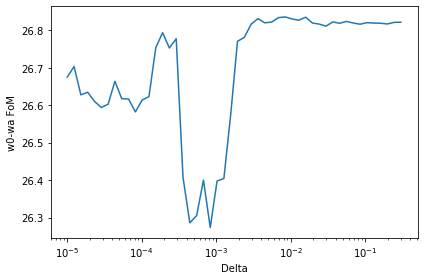

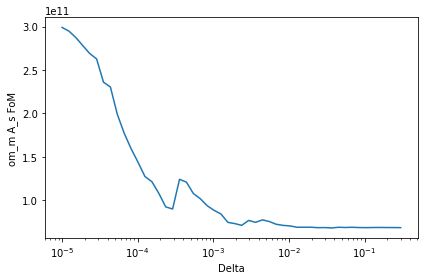

In [81]:
plt.semilogx(deltas_4, om_b_4_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_4, om_b_4_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

#### Parameter $w_0$

In [14]:
tune_para = 'w0'

#### Second order error

In [15]:
delta_start = 1e-5
delta_end = 3e-1
delta_num = 50
deltas_2 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [18]:
w0_2_fom_w0_wa = np.zeros(deltas_2.shape)
w0_2_fom_om_m_A_s = np.zeros(deltas_2.shape)
deriv_order = 2

In [19]:
for i in tqdm(range(len(deltas_2))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_2[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    w0_2_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    w0_2_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-06

om_m A_s 107129345600.57605
w0 wa 71.27212041067423
run 2/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.110740e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.110740e-05

om_m A_s 102858199596.86803
w0 wa 60.19088976036488
run 3/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.370825e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.370825e-05

om_m A_s 102365782314.2957
w0 wa 60.79076027455117
run 4/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.691812e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.691812e-05

om_m A_s 92647150525.26099
w0 wa 45.160142350413146
run 5/50
Changing paramater w0 from -9.000000e-01 by -1 * 2.087958e-05
Changing paramater w0 from -9.000000e-01 by 1 * 2.087958e-05

om_m A_s 61087341058.75657
w0 wa 24.19675886836642
run 6/50
Changing paramater w0 from -9.000000e-01 by -1 * 2.576865e-05
Changi

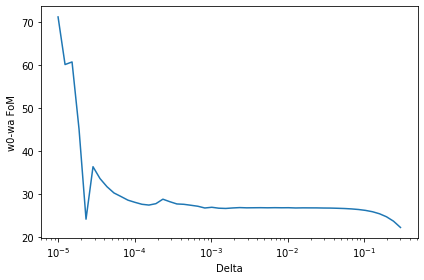

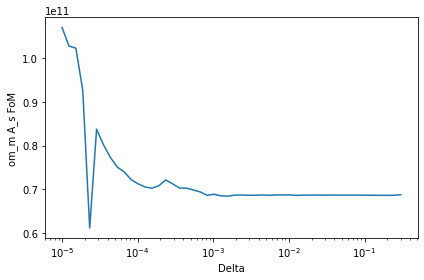

In [20]:
plt.semilogx(deltas_2, w0_2_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_2, w0_2_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

#### Fourth order error

In [22]:
delta_start = 1e-5
delta_end = 1e-1
delta_num = 50
deltas_4 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [24]:
w0_4_fom_w0_wa = np.zeros(deltas_4.shape)
w0_4_fom_om_m_A_s = np.zeros(deltas_4.shape)
deriv_order = 4

In [25]:
for i in tqdm(range(len(deltas_4))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_4[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    w0_4_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    w0_4_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater w0 from -9.000000e-01 by -2 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 2 * 9.000000e-06

om_m A_s 109799631580.44054
w0 wa 81.19214532436266
run 2/50
Changing paramater w0 from -9.000000e-01 by -2 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 2 * 1.086113e-05

om_m A_s 106444346855.42958
w0 wa 69.3742560552789
run 3/50
Changing paramater w0 from -9.000000e-01 by -2 * 1.310714e-05
Changing paramater w0 from -9.000000e-01 by -1 * 1.310714e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.310714e-05
Changing paramater w0 from -9.000000e-01 by 2 * 1.310714e-05

om_m A_s 102435550401.74838
w0 wa 59.68825793217163
run 4/50
Changing paramater w0 from -9.000000e-01 by -2 * 1.581760e-05
Changi

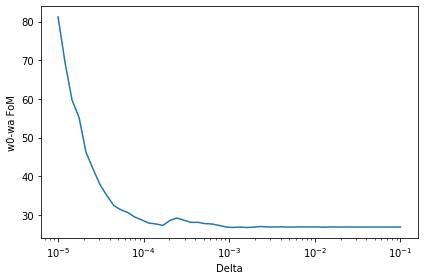

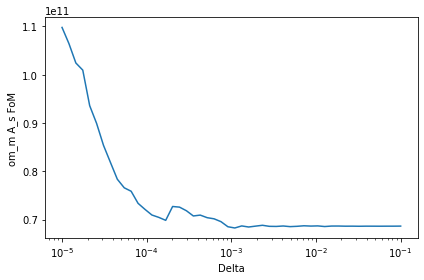

In [26]:
plt.semilogx(deltas_4, w0_4_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_4, w0_4_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

#### Sixth order error

In [27]:
delta_start = 1e-5
delta_end = 1e-1
delta_num = 50
deltas_6 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [28]:
w0_6_fom_w0_wa = np.zeros(deltas_6.shape)
w0_6_fom_om_m_A_s = np.zeros(deltas_6.shape)
deriv_order = 6

In [29]:
for i in tqdm(range(len(deltas_6))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_6[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    w0_6_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    w0_6_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater w0 from -9.000000e-01 by -3 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -2 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 2 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 3 * 9.000000e-06

om_m A_s 110662904912.89502
w0 wa 85.20163082709094
run 2/50
Changing paramater w0 from -9.000000e-01 by -3 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -2 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 2 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 3 * 1.086113e-05

om_m A_s 107454940833.38414
w0 wa 72.63723219574507
run 3/50
Changing paramater w0 from -9.000000e-01 by -3 * 1.310714e-05
Changing paramater w0 from -9.000000e-01 by -2 * 1.310714e-05
Chang

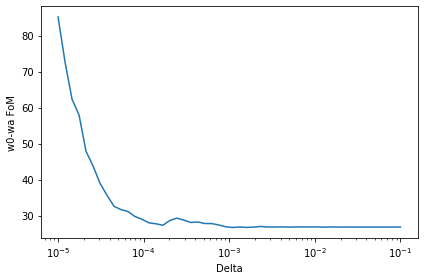

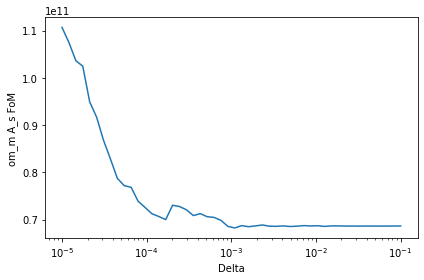

In [30]:
plt.semilogx(deltas_6, w0_6_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_6, w0_6_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

#### Eigth order error

In [31]:
delta_start = 1e-5
delta_end = 1e-1
delta_num = 50
deltas_8 = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

In [32]:
w0_8_fom_w0_wa = np.zeros(deltas_8.shape)
w0_8_fom_om_m_A_s = np.zeros(deltas_8.shape)
deriv_order = 8

In [33]:
for i in tqdm(range(len(deltas_8))):
    print("run %d/%d"%(i+1, delta_num))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, deriv_order, deltas_8[i])
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    w0_8_fom_w0_wa[i] = F.foms[('w0', 'wa')]
    w0_8_fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


run 1/50
Changing paramater w0 from -9.000000e-01 by -4 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -3 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -2 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 2 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 3 * 9.000000e-06
Changing paramater w0 from -9.000000e-01 by 4 * 9.000000e-06

om_m A_s 111083309400.06541
w0 wa 87.35647318531298
run 2/50
Changing paramater w0 from -9.000000e-01 by -4 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -3 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -2 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by -1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 1 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 2 * 1.086113e-05
Changing paramater w0 from -9.000000e-01 by 3 * 1.086113e-05
Changi

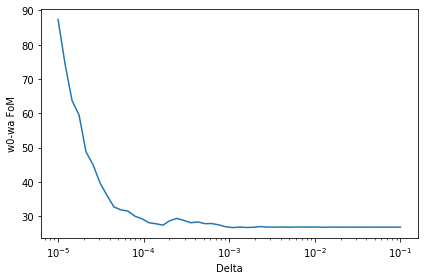

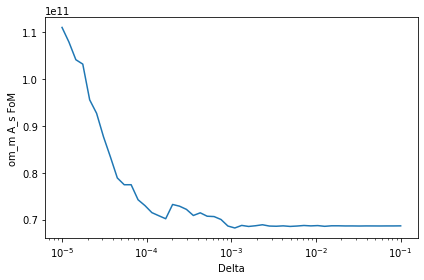

In [34]:
plt.semilogx(deltas_8, w0_8_fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas_8, w0_8_fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Plot all the tunings

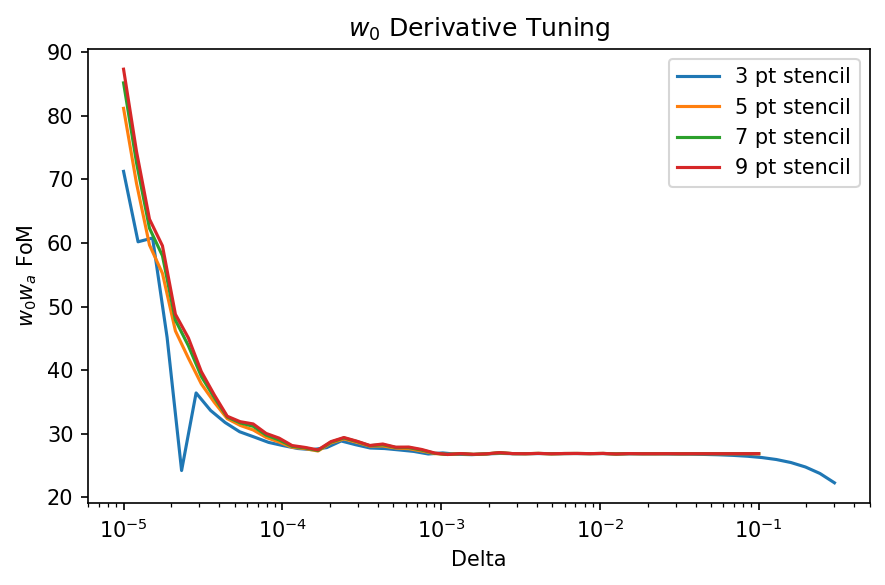

In [35]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, w0_2_fom_w0_wa, label="3 pt stencil")
plt.semilogx(deltas_4, w0_4_fom_w0_wa, label="5 pt stencil")
plt.semilogx(deltas_6, w0_6_fom_w0_wa, label="7 pt stencil")
plt.semilogx(deltas_8, w0_8_fom_w0_wa, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$w_0w_a$ FoM')
plt.legend()
plt.title(r'$w_0$ Derivative Tuning')
plt.tight_layout()
plt.show()

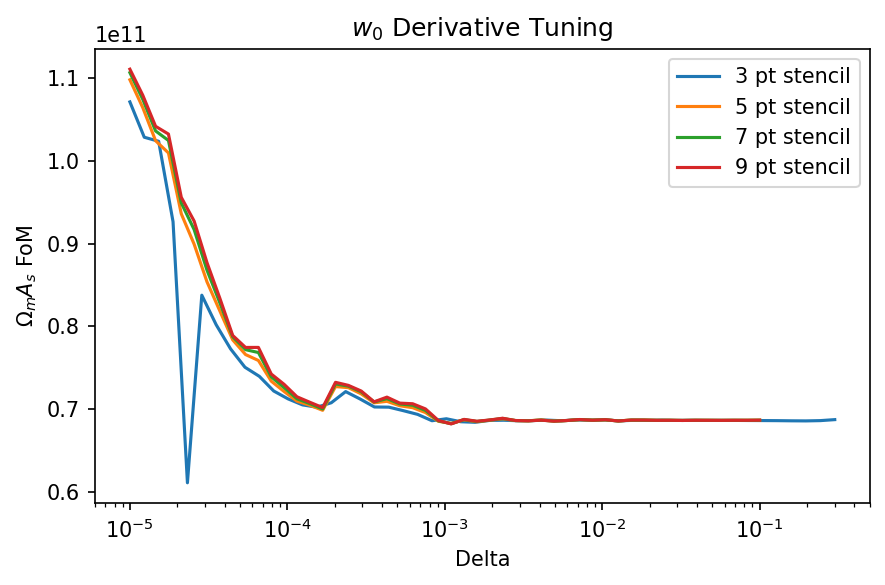

In [36]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, w0_2_fom_om_m_A_s, label="3 pt stencil")
plt.semilogx(deltas_4, w0_4_fom_om_m_A_s, label="5 pt stencil")
plt.semilogx(deltas_6, w0_6_fom_om_m_A_s, label="7 pt stencil")
plt.semilogx(deltas_8, w0_8_fom_om_m_A_s, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$\Omega_m A_s$ FoM')
plt.legend()
plt.title(r'$w_0$ Derivative Tuning')
plt.tight_layout()
plt.show()

In [56]:
for i,j,k,l in zip([2, 4, 6, 8],
                   [deltas_2, deltas_4, deltas_6, deltas_8], 
                   [w0_2_fom_om_m_A_s, w0_4_fom_om_m_A_s, w0_6_fom_om_m_A_s, w0_8_fom_om_m_A_s],
                   [w0_2_fom_w0_wa, w0_4_fom_w0_wa, w0_6_fom_w0_wa, w0_8_fom_w0_wa]):
    np.savetxt(X=np.vstack((j,k,l)).T, fname="out_FOM_vs_delta/ccl/FoM_vs_delta_w0_order_%d.dat"%i)